In [1]:
from IPython.core.display import Image, display

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  

In [3]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal, norm
import pandas as pd

In [4]:
def generate_example():
    x = np.array([10, 15, 20])
    y = np.array([5,9,8])
    xt = 25
    return x, y, xt

def draw_example(x, y, xt, aa):
    n = x.shape[0]
    aa.scatter(x,y, s=60, label='data')
    aa.scatter(x,np.zeros(n),marker='x',s=40)
    for ii in range(n):
        aa.plot(np.array([x[ii],x[ii]]),
                np.array([0, y[ii]]),
                linestyle='--',color='blue')
    aa.grid()
    aa.scatter(xt,0,marker='s',color='green',s=60, label='$x_t$')
    aa.set_xlabel('Observations')
    aa.set_ylabel('target')
    _ = aa.legend()

## Degree in Data Science and Engineering, group 96
## Machine Learning 2
### Fall 2022

&nbsp;
&nbsp;
&nbsp;
# Review of Machine Learning. Neighbors & Trees

&nbsp;
&nbsp;
&nbsp;

**Emilio Parrado Hernández**

Dept. of Signal Processing and Communications

&nbsp;
&nbsp;
&nbsp;

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

# Contents

- Review of machine learning basic concepts
 - Classification problems
 - Regression problems
 - Unsupervised learning problems
- Review of python and introduction to scikit learn
- K nearest neighbors
- Review of decision trees for classification and regression
- Review of ensemble methods (*random forests*)

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;

# Machine Learning basic concepts

&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;


<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

# Machine Learning pipeline

The machine learning pipe line to face the solution of any task can be sketched in the following steps

1. Decide relevant features
2. Gather data
3. Decide for a machine learning family of models
4. Learn (train) the model
5. Exploit the model (inference)
6. Interpret results

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

# Example: spam mail detection

## 1. Decide relevant features

  - 20th century: count wierd characters, count strings in capital letters
  - 21st century: feed in text as raw ascii + html tags + pictures + ...

## 2. Gather data

  - 20th century: ask each user to label a few hundreds of emails as spam or not
  - 21st: plugg several users gmail inboxes to a deep learning engine and unleash its power



<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

## 3. Decide for a machine learning family of models
  - kNN, SVM, Random Forest, Neural Network, toss a coin...
  - One of the main goals of this course
  - Combine statistics, machine learning, common sense, expertise, creativity, art

## 4. Learn (train) the model
  - Optimization
  - Secondary goal of this course (you'd better pick your lucky coin)
  

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

## 5. Exploit the model (inference)
  - Another main goal of this course (measure performance)
  - Calculus, computing

## 6. Interpret results
  - Prior domain knowledge
  - Where the **magic** happens. 


<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

# Computational example: a machine learning view of least squares

Application of steps 3, 4 and 5 in a very simple scenario of **linear regression** in 1D (finding out a straight line). 

We are given three observations in 1D (orange crosses in the plot) with their corresponding targets (blue circles) and the goal is to predict a target for the test observation $\mathbf x_t$ (green square).



<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

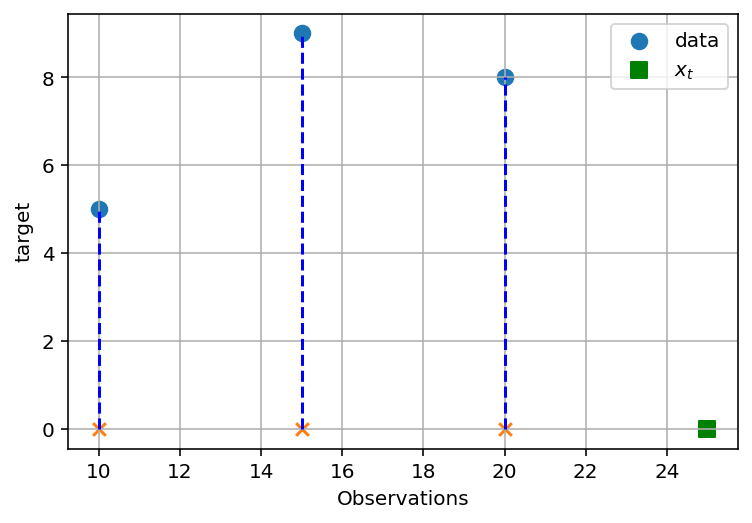

In [5]:
x,y,xt = generate_example()
ff,aa = plt.subplots(1,1)
draw_example(x,y,xt, aa)

## 3. Decide for a machine learning family of models
  
In this case we select a **linear regression model**. 
$$
y = ax + b
$$
where $x$ are the observations and $y$ are the targets.

This model depends on two parameters:
- slope $a$ and 
- intercept or bias term $b$.


  

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

## 4. Learn (train) the model

The **training algorithm** must find out suitable values for  $a$ and $b$ such that the model ends up **explaining the data**: we incur in a minimum error when we estimate the true targets $y$ with the **model** $ax+b$:

$$
\mbox{error}_i = (y_i - (ax_i+b))^2
$$

From your background in algebra you already know that this problem is solved finding out the line that better approximates the observations using Least Squares (a system of 3 equations with 2 unknowns)

$$
  \left[ \begin{array}{cc} 10 & 1 \\ 15 & 1 \\ 20 & 1\end{array} \right] \left[ \begin{array}{c} a \\ b \end{array} \right] = \left[ \begin{array}{c} 5 \\ 9 \\ 8\end{array} \right] 
$$  

The solution is 

$$
 \left[ \begin{array}{c} a \\ b \end{array} \right] =  \left (  \left[ \begin{array}{cc} 10 & 1 \\ 15 & 1 \\ 20 & 1\end{array} \right]^\top \left[ \begin{array}{cc} 10 & 1 \\ 15 & 1 \\ 20 & 1\end{array} \right]\right )^{-1}
  \left[ \begin{array}{cc} 10 & 1 \\ 15 & 1 \\ 20 & 1\end{array} \right]^\top \left[ \begin{array}{c} 5 \\ 9 \\ 8\end{array} \right] 
$$  

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

In [6]:
X = np.vstack((x, np.ones(3))).T
print("X=",X)
print("Y=", y)

w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
a = w[0]
b = w[1]
print("Solution: a = {0:.3f}, b = {1:.3f}".format(a,b))

X= [[10.  1.]
 [15.  1.]
 [20.  1.]]
Y= [5 9 8]
Solution: a = 0.300, b = 2.833


## A machine learning flavored solution

We are using a very simple machine learning algorithm to find values for $a$ and $b$ to avoid spoiling the regression blocks of this course

1. Choose at random 5 values for parameters $(a,b)$
2. Evaluate the error of each model in the training set
3. Choose as final model the one with the smallest error

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />



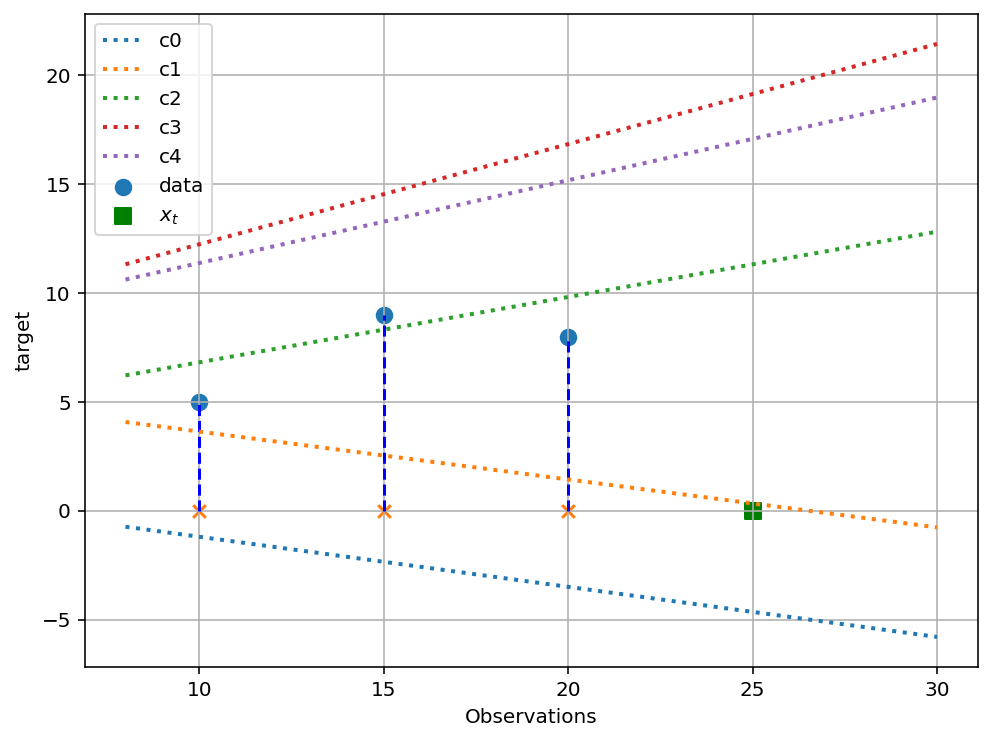

In [7]:
np.random.seed(1234)
# Choose candidate models
n_candidates = 5
B = np.round(np.random.uniform(-1,10,size=n_candidates),2)
A = np.round(np.random.uniform(-.5,.5,size=n_candidates),2)

ff,aa = plt.subplots(1,1, figsize=(8,6))
draw_example(x,y,xt,aa)

xg = np.array([8,30])
for ii in range(n_candidates):
    yg = A[ii] * xg  + B[ii]
    aa.plot(xg, yg, linestyle=':', linewidth=2, label="c{0:d}".format(ii))

_=aa.legend()

In [8]:
# Evaluate each candidate error
E = np.empty(n_candidates)
for ii in range(n_candidates):
    pred = A[ii] * x + B[ii]
    E[ii] = np.sum((y - pred)**2)
    print("Candidate c{0:d}, error: {1:.2f}".format(ii,E[ii]))
# Best candidate
best_c = np.argmin(E)
print("------------------------")
print("The best candidate is c{0:d}: a = {1:.3f}, b = {2:.3f} ".format(best_c, A[best_c], B[best_c]))

Candidate c0, error: 298.93
Candidate c1, error: 86.61
Candidate c2, error: 7.09
Candidate c3, error: 161.25
Candidate c4, error: 110.58
------------------------
The best candidate is c2: a = 0.300, b = 3.820 


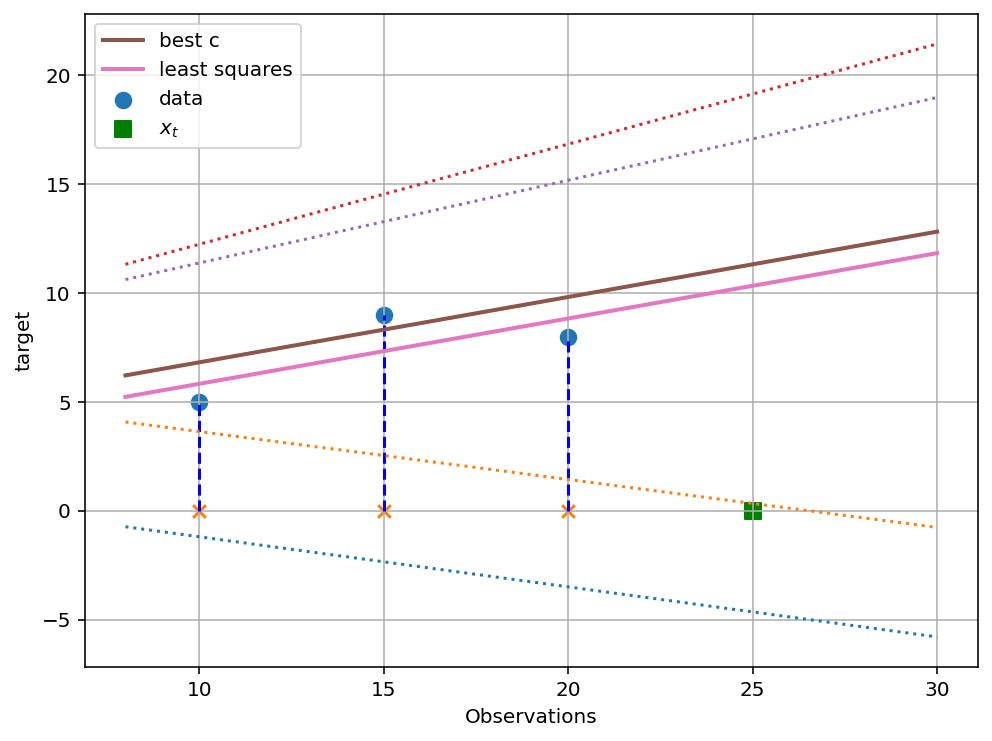

In [9]:
ff,aa = plt.subplots(1,1, figsize=(8,6))
draw_example(x,y,xt,aa)

xg = np.array([8,30])
for ii in range(n_candidates):
    yg = A[ii] * xg  + B[ii]
    aa.plot(xg, yg, linestyle=':')
yg = A[best_c] * xg  + B[best_c]
aa.plot(xg, yg, linewidth='2', label='best c')
aa.plot(xg, a*xg + b, linewidth='2', label='least squares')
_=aa.legend()

## 5. Exploit the model (inference)
  
  Finding out the predicted $\hat y_t$ for the test observation $\mathbf x_t$:
  
  $$
  \hat y_t = ax_t + b
  $$

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

In [10]:
yt_ml = A[best_c] * xt + B[best_c]
yt_ls = a * xt + b

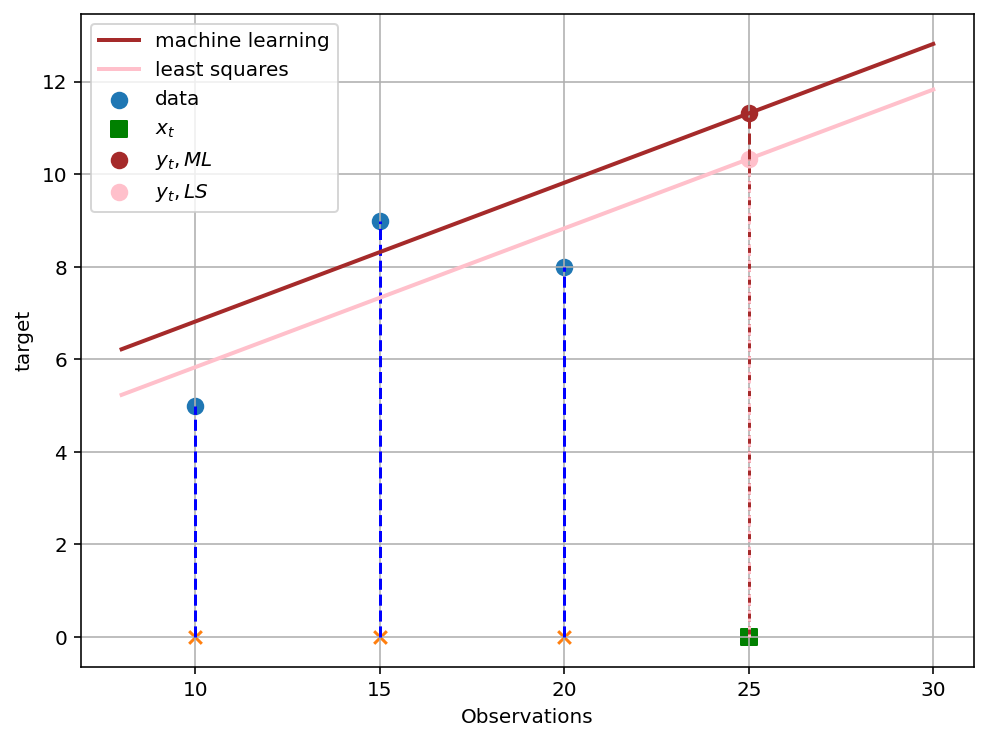

In [11]:
ff,aa = plt.subplots(1,1, figsize=(8,6))
draw_example(x,y,xt,aa)
xg = np.array([8,30])
yg = A[best_c] * xg  + B[best_c]
aa.plot(xg, yg, linewidth='2', label='machine learning', color='brown')
aa.plot(xg, a*xg + b, linewidth='2', label='least squares', color='pink')
aa.plot(np.array([xt,xt]),
            np.array([0, yt_ml]),
            linestyle='--',color='brown')
aa.scatter(xt,yt_ml, s=60, label='$y_t, ML$', color='brown')

aa.plot(np.array([xt,xt]),
            np.array([0, yt_ls]),
            linestyle=':',color='pink')
aa.scatter(xt,yt_ls, s=60, label='$y_t, LS$', color='pink')
_=aa.legend()

# Supervised learning algorithms

Find out a model $f(\mathbf x)$ that predicts an accurate target $\hat y_t$ for every observation $\mathbf x_t$

The common situation is that $f(\mathbf x)$ is a template with some **free parameters** and we use the **training data** and a machine learning **algorithm** to find suitable values for these parameters, that is, **training the model**

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

## Classification problems

- Credit grating
- Face / fingerprint recognition
- Image classification
- Terrain classification with remote (satellite) sensing
- OCR
- Spam filtering
- Medical tests for the detection of diseases

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

## Machine classification

We are given an **item** and we have to find out to **which class it belongs** from a predetermined set of classes

- Set of classes $\mathcal C=\{C_1,C_2,\dots,C_k\}$ defined **a priori**
- Finite number of classes: $k$
- Particular case $k=2$: Binary classification or detection. In this case sometimes classes are named $\{0,1\}$ or $\{-1, 1 \}$.



<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

**Training data**

We are given a set of pairs $\{(\mathbf x_1, y_1), (\mathbf x_2, y_2), \dots, (\mathbf x_n, y_n)\}$ where each $\mathbf x_i$ is an array (vector) that contains $d$ real valued (or caregorical, boolean, etc) features representing the $i$-th item and $y_i$ is the corresponding *target*, in this case the true class of item $\mathbf x_i$.


$$ 
\mathbf {x}_i = \left[\begin{array}{c} x_{i,1} \\  x_{i,2} \\ \vdots \\ x_{i,d} \end{array}   \right],\quad y_i  \in \{1,2,\dots,k\}
$$

Pythonically

`x_i = np.array([x_i1, x_i2, ..., x_id])` 

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

## Regression problems

- Credit scoring
- Tracking mobile objects
- Prediction of energy consumption
- Estimation of prices of properties, cars, articles, etc
- Estimation of volumes traded in markets
- Medical scores with diagnostical purposes

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

## Machine regression

We are given an **item** and we have to find out a   **real-valued score** (or some scores, in vector outputs)

**Training data**

We are given a set of pairs $\{(\mathbf x_1, y_1), (\mathbf x_2, y_2), \dots, (\mathbf x_n, y_n)\}$ where each $\mathbf x_i$ is an array (vector) that contains $d$ real valued (or caregorical, boolean, etc) features representing the $i$-th item and $y_i$ is the corresponding *target*, in this case the true value of the score corresponding to item $\mathbf x_i$.


$$ 
\mathbf {x}_i = \left[\begin{array}{c} x_{i,1} \\  x_{i,2} \\ \vdots \\ x_{i,d} \end{array}   \right],\quad y_i  \in \mathbb R
$$

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

# Unsupervised Learning applications

- Novelty detection in security applications
- Clustering of customers in business intelligence/marketing
- Segmentation of audio clips
- Segmentation of videos
- Automatic categorization of collections of music, documents, etc

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

## Unsupervised Learning algorithms

There are **no targets**, just observations.

Use prior knowledge to find patterns underlying data, such as groups, etc

Difficult to assess the performance of these algorithms

Machine Learning for humans.

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

&nbsp;
&nbsp;
&nbsp;

# Method of the k Nearest Neighbors

&nbsp;
&nbsp;
&nbsp;


<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />





# k nearest neighbors (kNN)

- It's a non-parametric model. Well, there is one **hyperparameter**, $k$, the number of neighbors.

- Underlying assumption: If two observations $\mathbf x_i$ and $\mathbf x_j$ are close enough, it is reasonable to think their corresponding targets, $y_i$ and $y_j$ will also be similar.
 - This means that the model we need to learn, $f(\mathbf x)$ is **smooth**
 - In a classification setting this means that with high probability, we would expect $y_i=y_j$
- The value of $k$ has to be fixed with **prior domain knowledge**, that is, there is a suitable range of values of $k$ for every problem.
- $k$NN can be used both in **classification** and in **regresion** tasks.  

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />


## Classification with $k$NN

### 1. Classification of a test observation $\mathbf x_t$

- Find out the $k$ training observations that lay at **a shorter distance** from  $\mathbf x_t$: These observations are $\mathbf x_t$  $k$ **nearest neighbors**  
- Retrieve the corresponding targets of these $k$ neighbors. Notice $k$NN serves for both binary and multiclass problems.
- Classify $\mathbf x_t$ in the **majority class** among its neighbors. 

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />


   
### 2. Learning the model

- In fact there is no model, just a **table that stores the training observations** and their **targets**.  

- Choose a **distance** or **metric** to compare the observations, typically the **Euclidean distance** or  **$L_2$ norm**:

$$
d(\mathbf x_1,\mathbf x_2) = \sqrt{\sum_{j=1}^d( x_{1,j} - x_{2,j})^2} = \sqrt{(\mathbf x_1 - \mathbf x_2)^\top(\mathbf x_1 - \mathbf x_2)}
$$  in python `d_x1_x2 = numpy.linalg.norm(x1-x2)` 

- Fix $k$ (number of neighbors)

- Fix a voting strategy to determine the majority class from the $k$ neighbors:
  - Each neighbor contributes a unit vote to its corresponding class
  - Each neighbor vote is **weighted inversely proportional** to its distance to  $\mathbf x_t$. 

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />


##  Toy problem
&nbsp;
&nbsp;
&nbsp;
<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

In [12]:
from sklearn.datasets import make_classification, make_moons

x,y = make_classification(n_samples=20, 
                          n_features=2,
                          n_informative=2, 
                          n_redundant=0,
                          n_repeated=0, 
                          n_classes=2, 
                          n_clusters_per_class=2,
                          weights=None, 
                          flip_y=0.01, 
                          class_sep=1.0, 
                          hypercube=False, 
                          shift=0.0, 
                          scale=1.0, 
                          shuffle=True, 
                          random_state=42)
xt = np.array([-0.2, 0.7])

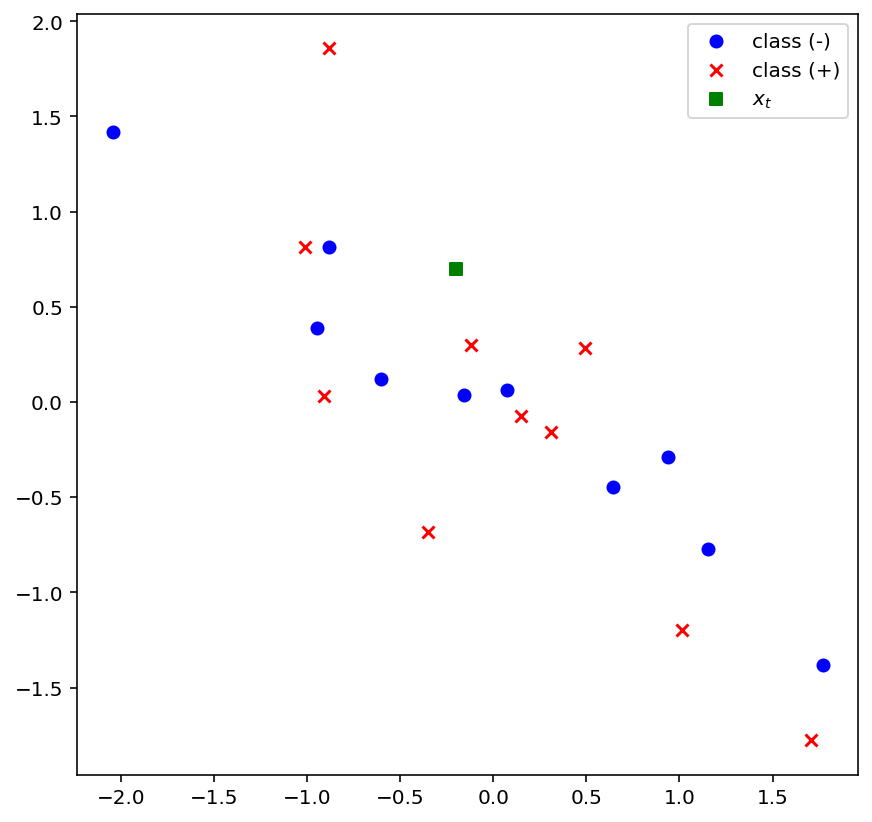

In [13]:
def draw_example(ax, x,y,xt=None, yt=None, alfa=1):
  ax.scatter(x[y==0,0],x[y==0,1],color='blue',marker='o', label='class (-)',alpha=alfa)
  ax.scatter(x[y==1,0],x[y==1,1],color='red',marker='x', label='class (+)',alpha=alfa)
  if xt is not None:
    if xt.ndim > 1:
      if yt is None:
        ax.scatter(xt[:,0], xt[:,1], marker='s', color='green', label ='$x_t$')
      else:
        ax.scatter(xt[yt==0,0],xt[yt==0,1],color='green',marker='o', label='class (-), test')
        ax.scatter(xt[yt==1,0],xt[yt==1,1],color='green',marker='x', label='class (+), test')
    else:
      if yt is None:
        ax.scatter(xt[0], xt[1], marker='s', color='green', label ='$x_t$')
      else:
        if yt == 0:
          ax.scatter(xt[0], xt[1], marker='o', color='green', label ='$x_t$')
        else:
          ax.scatter(xt[0], xt[1], marker='x', color='green', label ='$x_t$')
fx,ax = plt.subplots(1,1,figsize=(7,7))
draw_example(ax,x,y,xt)
_=ax.legend()

In [14]:
from sklearn.metrics import pairwise_distances 
distances = pairwise_distances(xt.reshape(1,-1), x,'euclidean') 

# sort all neighbors according to their distance to the test sample
id_neighbors = np.argsort(distances) # indices of the training observations who is the kth neighbor?

sorted_distances = 1e-6+np.sort(distances) # distances to neighbors, how far is the kth neighbor?

# class of each neighbor
class_neighbors = y[id_neighbors]
# weight for each neighbor vote
weight_neighbor = 1./sorted_distances



In [15]:
def draw_radius(c,x,ax):
  for ii in range(len(x)):
    ax.plot([c[0],x[ii,0]],
            [c[1],x[ii,1]],
            linestyle=':',
            linewidth=2)
    
def draw_votes(y, w, ax):
  labels = ['unit', 'weighted']
  k = len(y)
  bottom = np.zeros(2)
  width = 0.5
  for ii in range(k):
    if y[ii] == 1:
      color = 'red'
    else:
      color = 'blue'
    ax.bar(labels, [1./k, w[ii]], 
           width=width, 
           label='neighbor {0:d}'.format(ii+1),
           bottom = bottom,
           edgecolor='black',
           color=color)
    bottom += np.array([1./k, w[ii]])

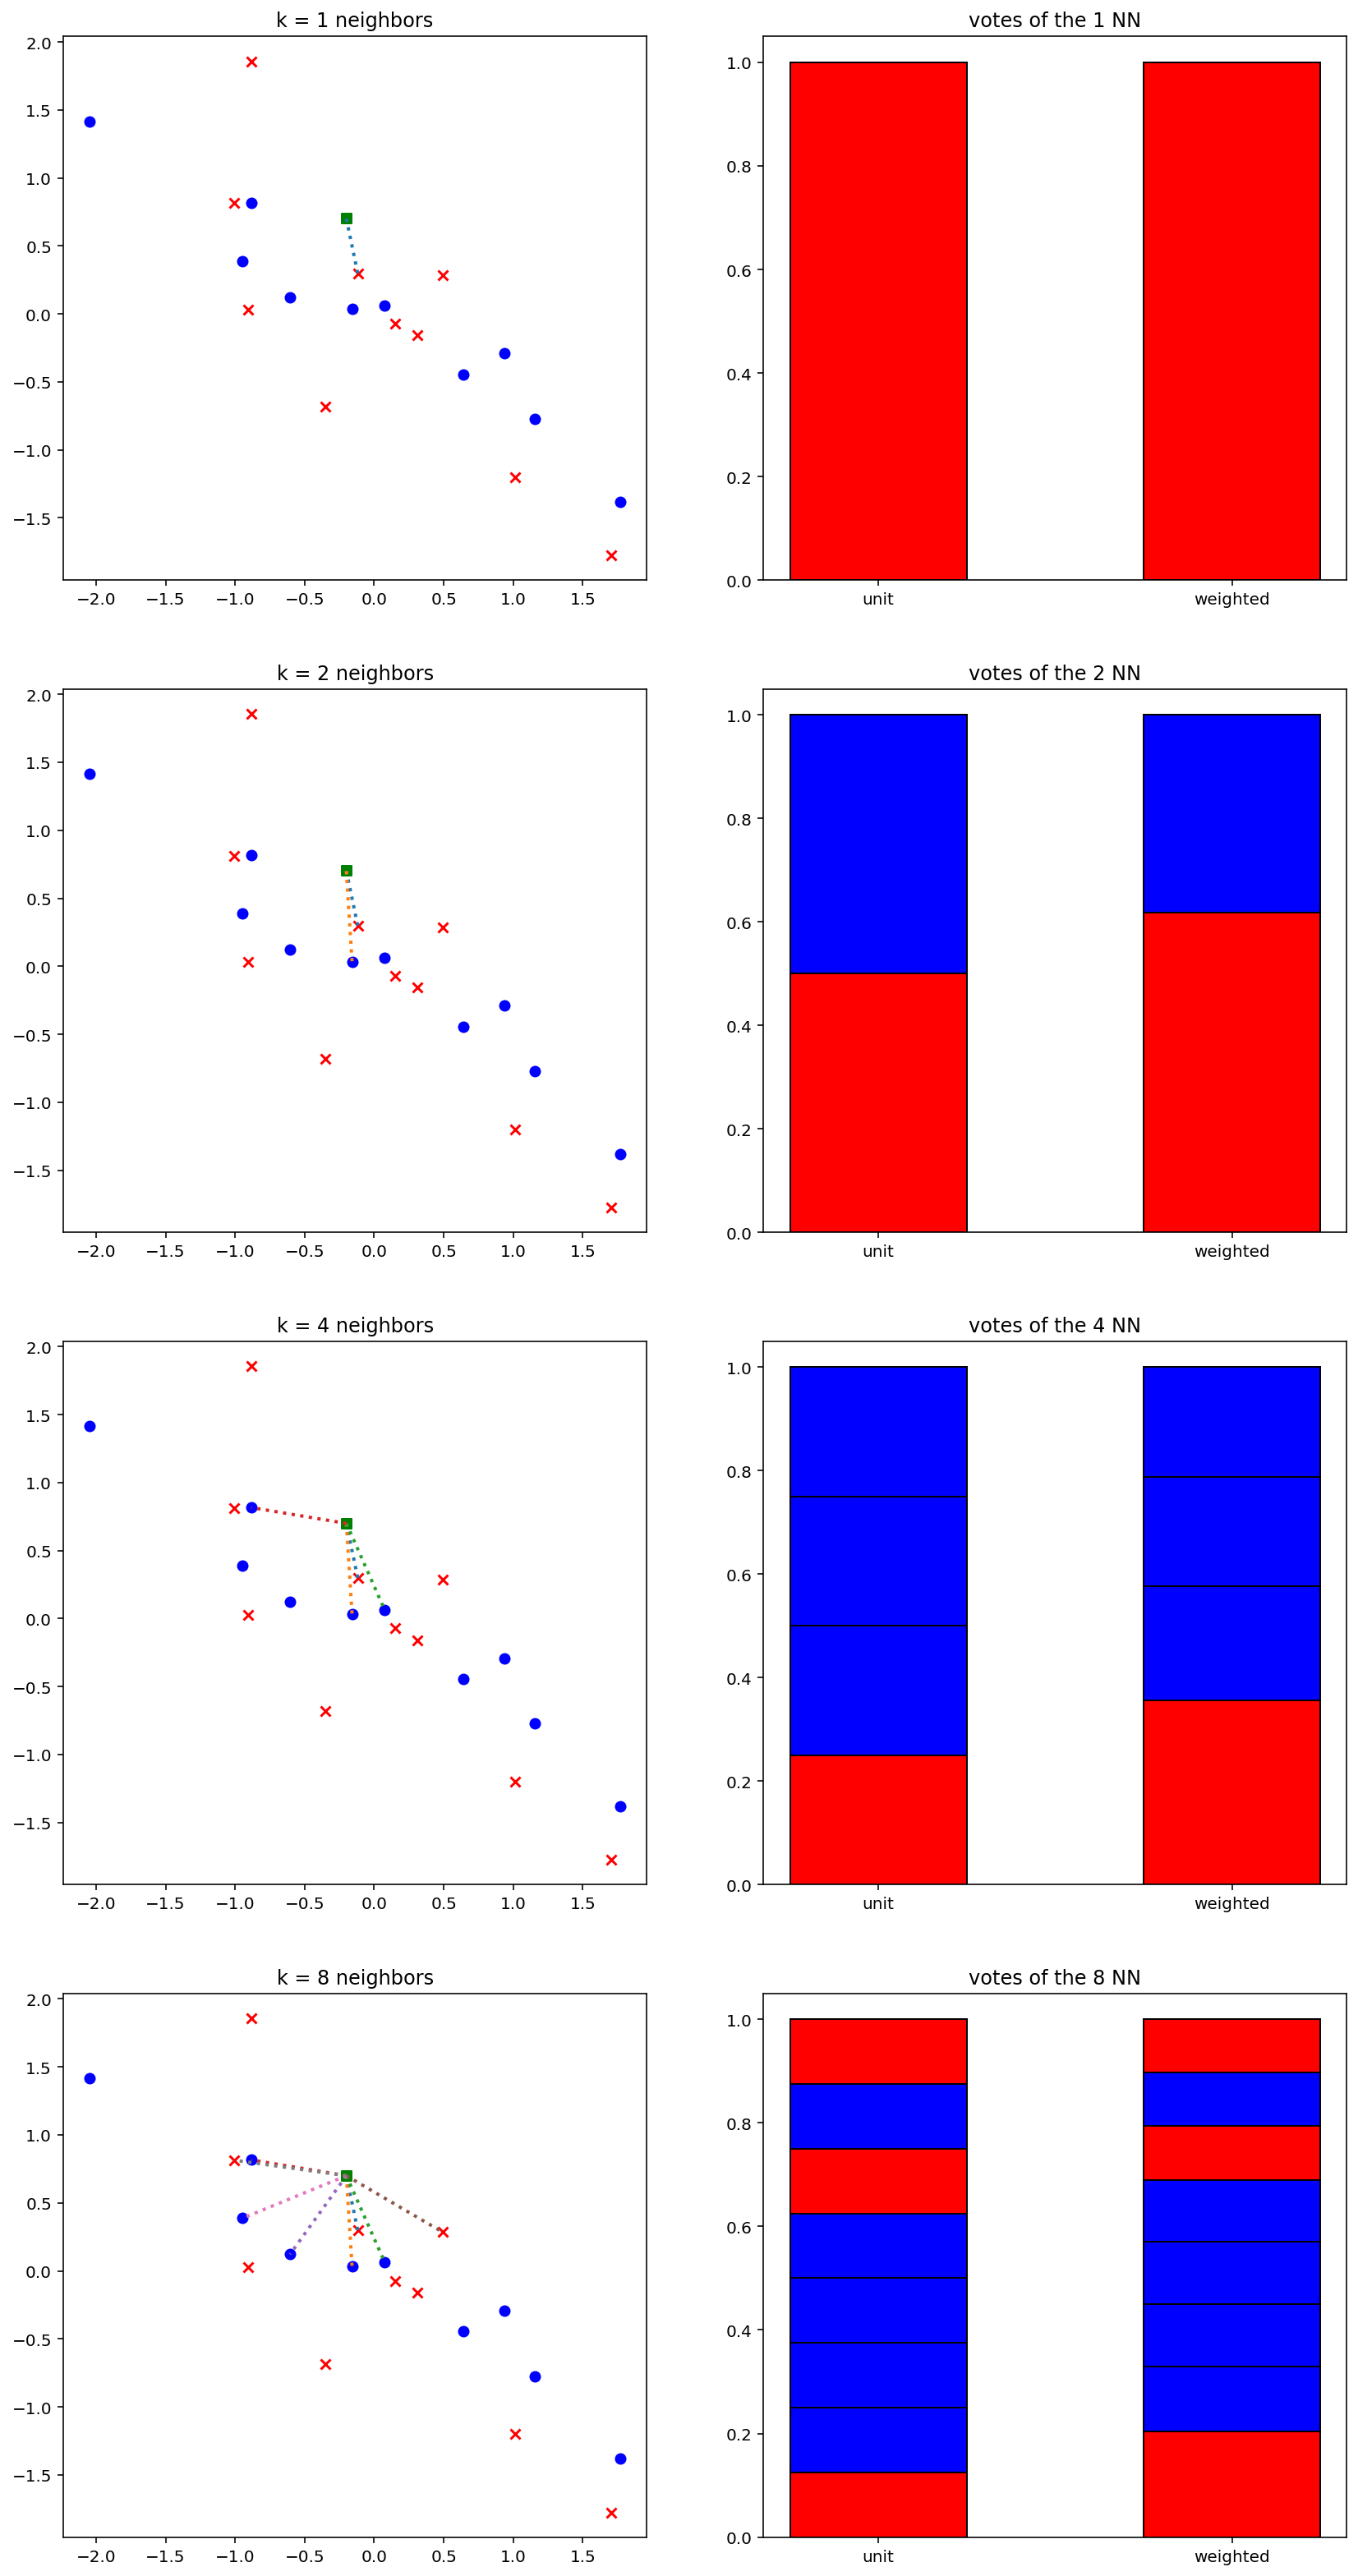

In [16]:
v_k = np.array([1,2,4,8])
ii=7
fx,ax = plt.subplots(len(v_k),2,figsize=(2*ii,len(v_k)*ii))
for ik,kk in enumerate(v_k):
  ax[ik][0].set_title('k = {0:d} neighbors'.format(kk))
  ax[ik][1].set_title('votes of the {0:d} NN'.format(kk))
  draw_example(ax[ik][0],x,y,xt) 
  draw_radius(xt,np.array([x[cc,:] for cc in id_neighbors[0,:kk]]),ax[ik][0])
  draw_votes(class_neighbors[0,:kk], weight_neighbor[0,:kk]/np.sum(weight_neighbor[0,:kk]), ax[ik][1])

## kNN with scikit learn

[Scikit learn](https://scikit-learn.org/stable/)  is a python set of tools that contains implementations of a number of machine learning algorithms and utilities for data analysis.

Scikit learn plays a principal role in the development of this course. We are kicking off with its [*kNN*](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) implementation. 

All the sklearn algorithm implementations present **three fundamental methods**:
- [`fit`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit): **Train** the model (use a training set to find values for the free parameters). In a supervised learning setting the arguments to fit are:
 -  `numpy array` with the observations, one observation per **row**
 - `numpy array` with the corresponding targets



  - [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict): Exploit the model to make **inference**. The  argument of this method is a `numpy array` with the observations of the test set, one observation per row. The output is the estimated target per each observation in the input.

  - [`score`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.score): **Evaluate** the model. Each model has a particular *score* function. This is a statistic that quantifies the quality of all the predictions made for the test set. A usual score in classification problems is the **correct classifications rate**. This is the fraction of the test set for which the model found the correct class.

 The arguments of method  `score` are the test observations and the true targets of the test set.


First we are generating a test set independent of the training set in order to perform a fair evaluation of the accuracy of the model.

In [17]:
nn=60
nr = 40
zx,zy =make_moons(n_samples=nn, noise=0.5, random_state=0)
x = zx[:nr,:]
y = zy[:nr]
xt = zx[nr:,:]
yt = zy[nr:]


In real life our toy problem would look like this, as we don't know the class of the test examples.

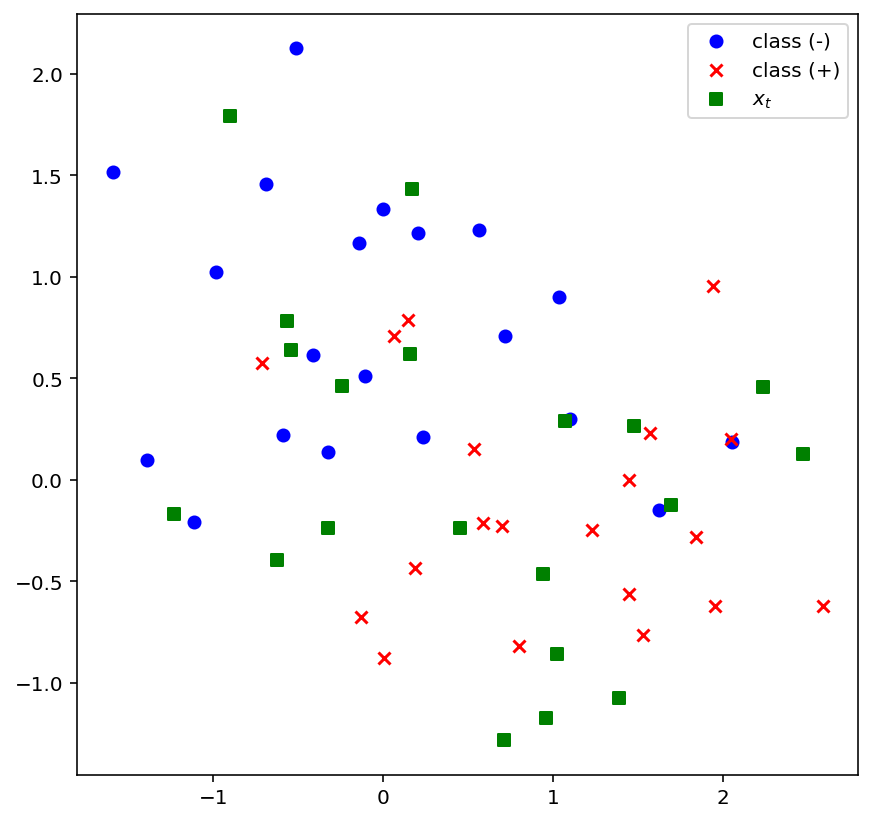

In [18]:
fx,ax = plt.subplots(1,1,figsize=(7,7))
draw_example(ax,x,y,xt)
_=ax.legend()

But in lab conditions, we do know the true test targets, although we can't use them to train the model

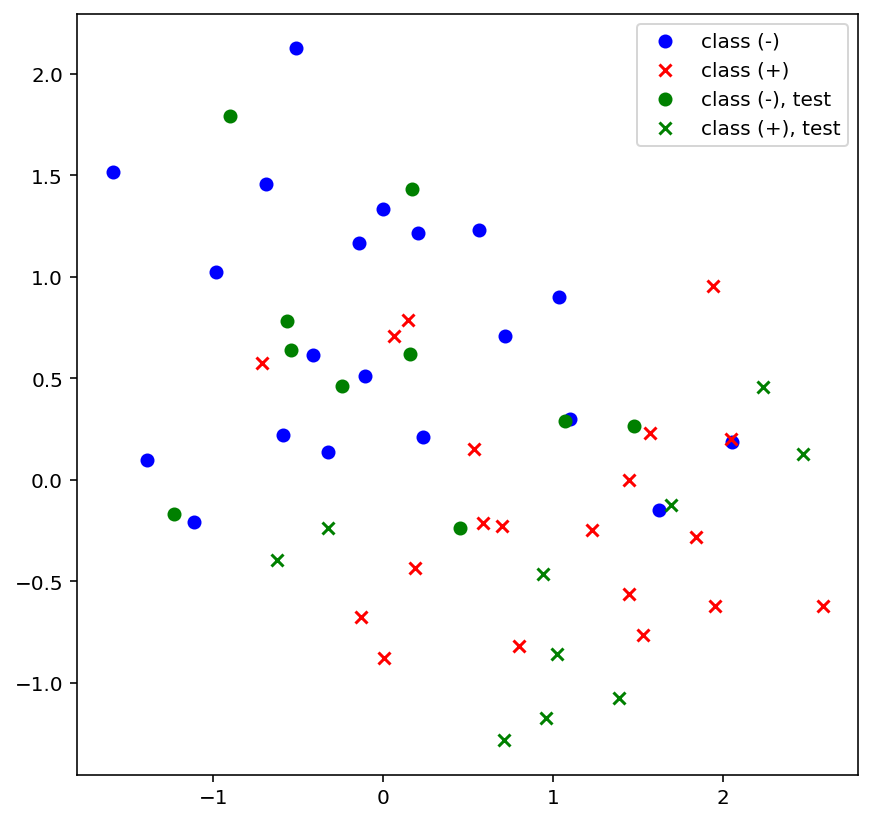

In [19]:
fx,ax = plt.subplots(1,1,figsize=(7,7))
draw_example(ax,x,y,xt, yt)
_=ax.legend()

Classification with 1NN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 1
knn = KNeighborsClassifier(n_neighbors=n_neighbors) # instantiate object
knn.fit(x, y) # train
predicted_yt = knn.predict(xt) # predict
acc_train_set = knn.score(x, y) # evaluate 
acc_test_set = knn.score(xt, yt) # evaluate
print("Accuracy in the training set: {0:.2f}%".format(acc_train_set*100.))
print("Accuracy in the test set: {0:.2f}%".format(acc_test_set*100.))

Accuracy in the training set: 100.00%
Accuracy in the test set: 65.00%


In [21]:
predicted_yt # prediction for every test value

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1])

### A first interpretation of the results



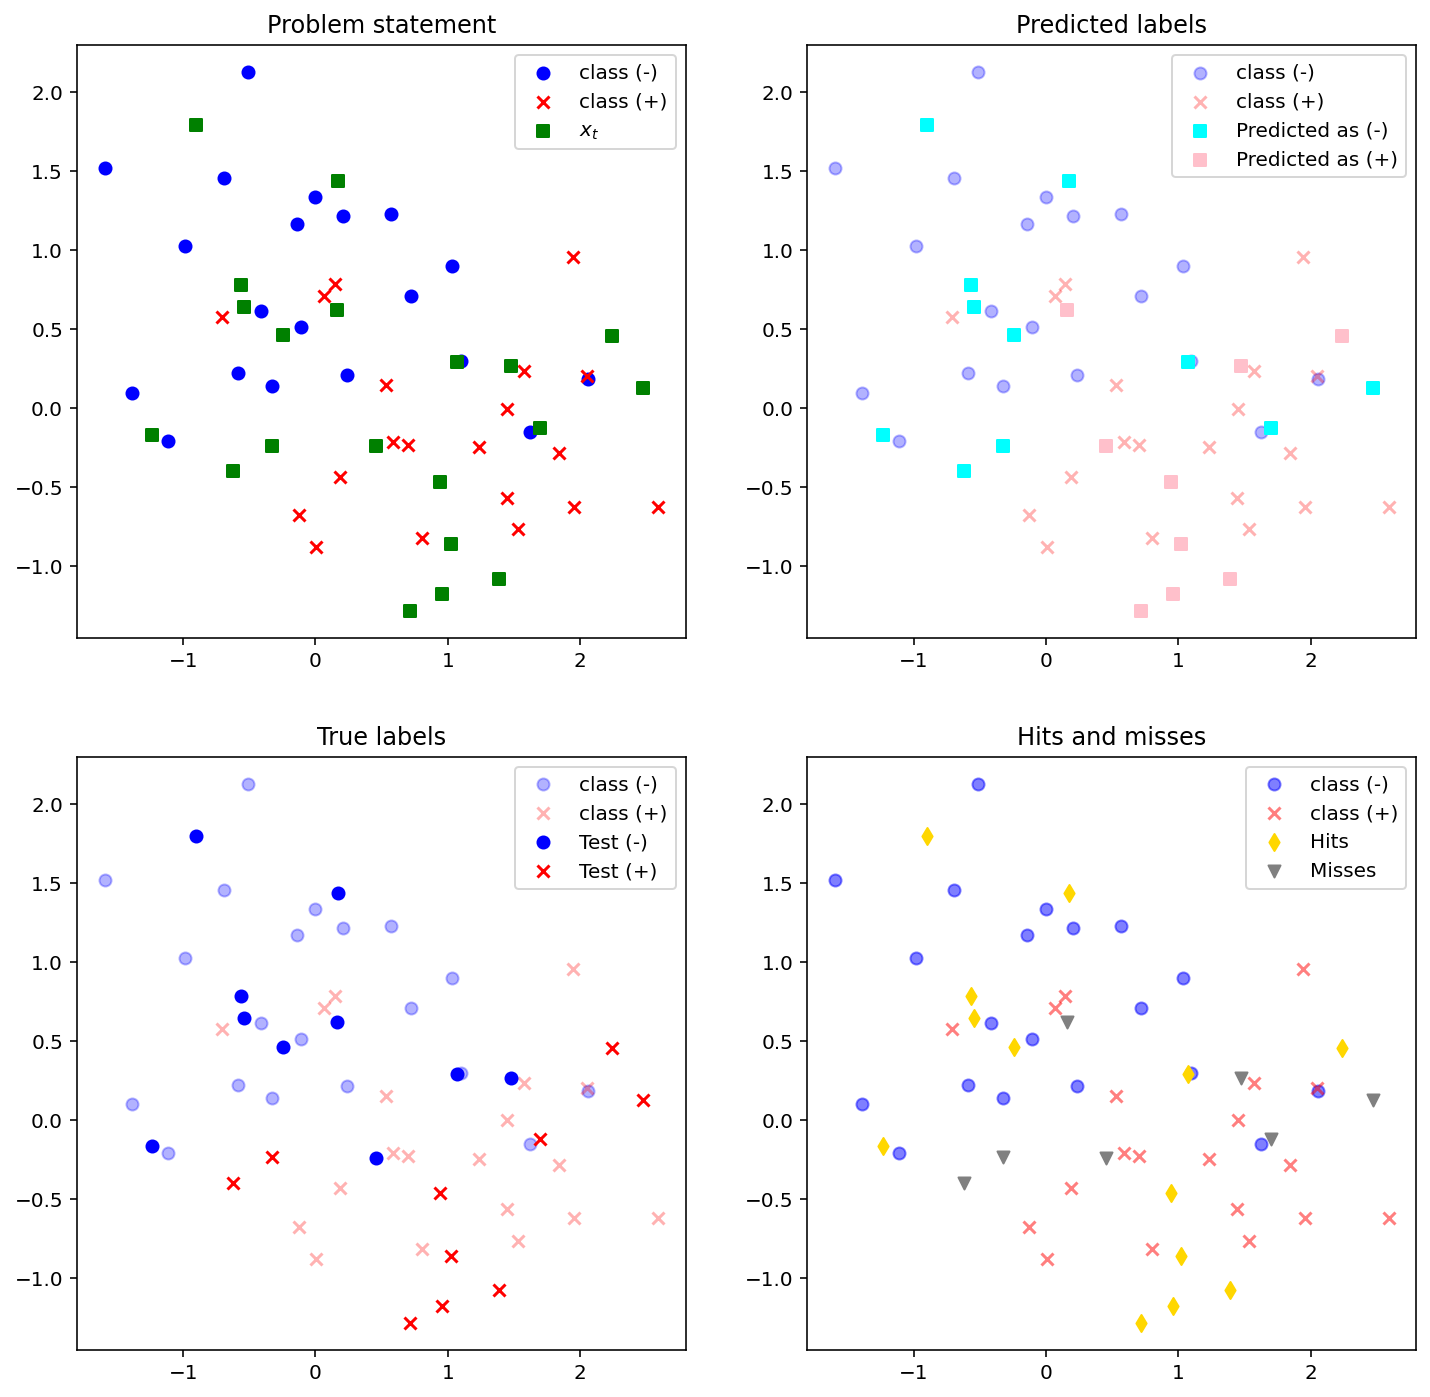

In [22]:
fx,ax = plt.subplots(2,2,figsize=(12,12))
draw_example(ax[0][0], x,y,xt)
_=ax[0][0].legend()
_=ax[0][0].set_title('Problem statement')

draw_example(ax[0][1],x,y,alfa=0.3)
ax[0][1].scatter(xt[(predicted_yt==0),0],
              xt[(predicted_yt==0),1],
              marker='s',
              color='cyan',
              label='Predicted as (-)')
ax[0][1].scatter(xt[(predicted_yt==1),0],
              xt[(predicted_yt==1),1],
              marker='s',
              color='pink',
              label='Predicted as (+)')

_=ax[0][1].legend()
_=ax[0][1].set_title('Predicted labels')

draw_example(ax[1][0],x,y,alfa=0.3)
ax[1][0].scatter(xt[(yt==0),0],
              xt[(yt==0),1],
              marker='o',
              color='blue',
              label='Test (-)')
ax[1][0].scatter(xt[(yt==1),0],
              xt[(yt==1),1],
              marker='x',
              color='red',
              label='Test (+)')

_=ax[1][0].legend()
_=ax[1][0].set_title('True labels')

draw_example(ax[1][1],x,y,alfa=0.5)
ax[1][1].scatter(xt[(yt==predicted_yt),0],
              xt[(yt==predicted_yt),1],
              marker='d',
              color='gold',
              label='Hits')
ax[1][1].scatter(xt[(yt != predicted_yt),0],
              xt[(yt != predicted_yt),1],
              marker='v',
              color='gray',
              label='Misses')
_=ax[1][1].legend()
_=ax[1][1].set_title('Hits and misses')


### Impact of the number of neighbors


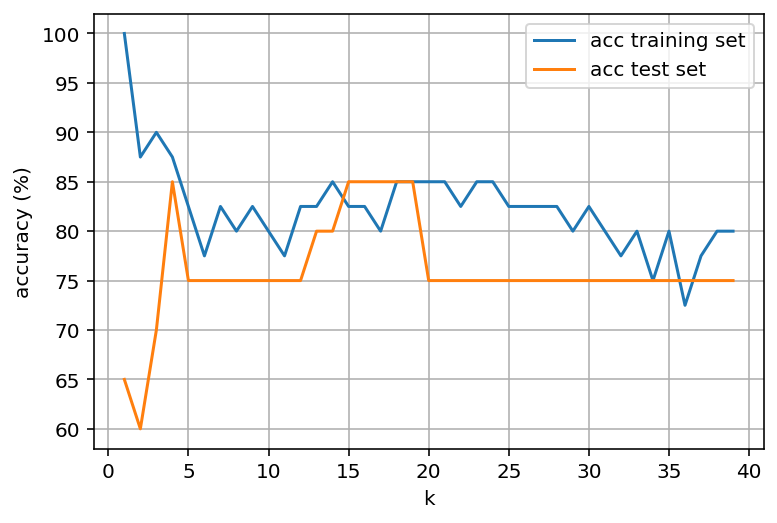

In [23]:
v_nn = range(1,len(y))
ac_entr = np.empty(len(v_nn))
ac_test = np.empty(len(v_nn))
for inn, n_neighbors in enumerate(v_nn):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x, y)
    ac_entr[inn] = knn.score(x, y)
    ac_test[inn] = knn.score(xt, yt)
plt.figure()
plt.plot(v_nn, ac_entr*100, label='acc training set')
plt.plot(v_nn, ac_test*100, label='acc test set')
_ = plt.xlabel('k')
_ = plt.ylabel('accuracy (%)')
_ = plt.legend()
plt.grid()

In [24]:
best_k = v_nn[np.argmax(ac_test)]
print("Best K in test is {0:d}, test accuracy of  {1:.2f}%".format(best_k, 
                                                                                                     100.*np.max(ac_test)))


Best K in test is 4, test accuracy of  85.00%


### Weigh each neighbor vote by its distance to the test observation

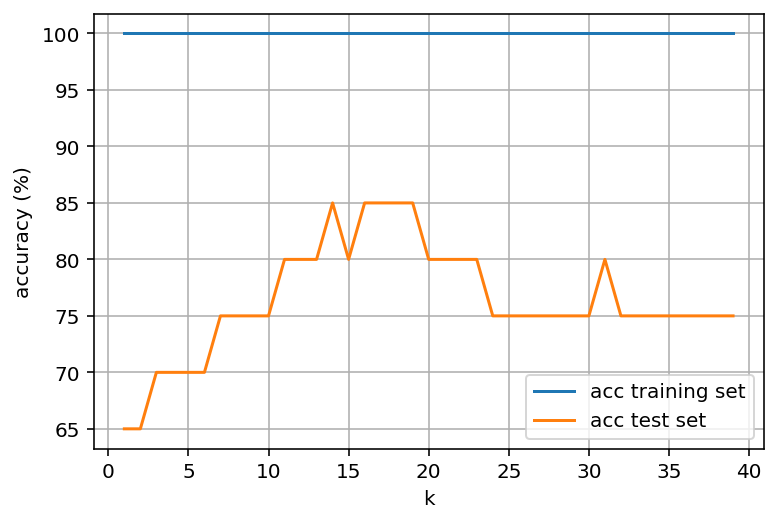

In [25]:
##
##
##
##
##
ac_entr_w = np.empty(len(v_nn))
ac_test_w = np.empty(len(v_nn))
for inn, n_neighbors in enumerate(v_nn):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,
                              weights='distance')
    knn.fit(x, y)
    ac_entr_w[inn] = knn.score(x, y)
    ac_test_w[inn] = knn.score(xt, yt)
plt.figure()
plt.plot(v_nn, ac_entr_w*100, label='acc training set')
plt.plot(v_nn, ac_test_w*100, label='acc test set')
_ = plt.xlabel('k')
_ = plt.ylabel('accuracy (%)')
_ = plt.legend()
plt.grid()

In [26]:
best_k = v_nn[np.argmax(ac_test_w)]
print("Best K in the test if votes are weighted by distances is {0:d}, accuracy in the test set of  {1:.2f}%".format(best_k, 
                                                                                                     100.*np.max(ac_test_w)))


Best K in the test if votes are weighted by distances is 14, accuracy in the test set of  85.00%


### Visualization of the classification boundaries

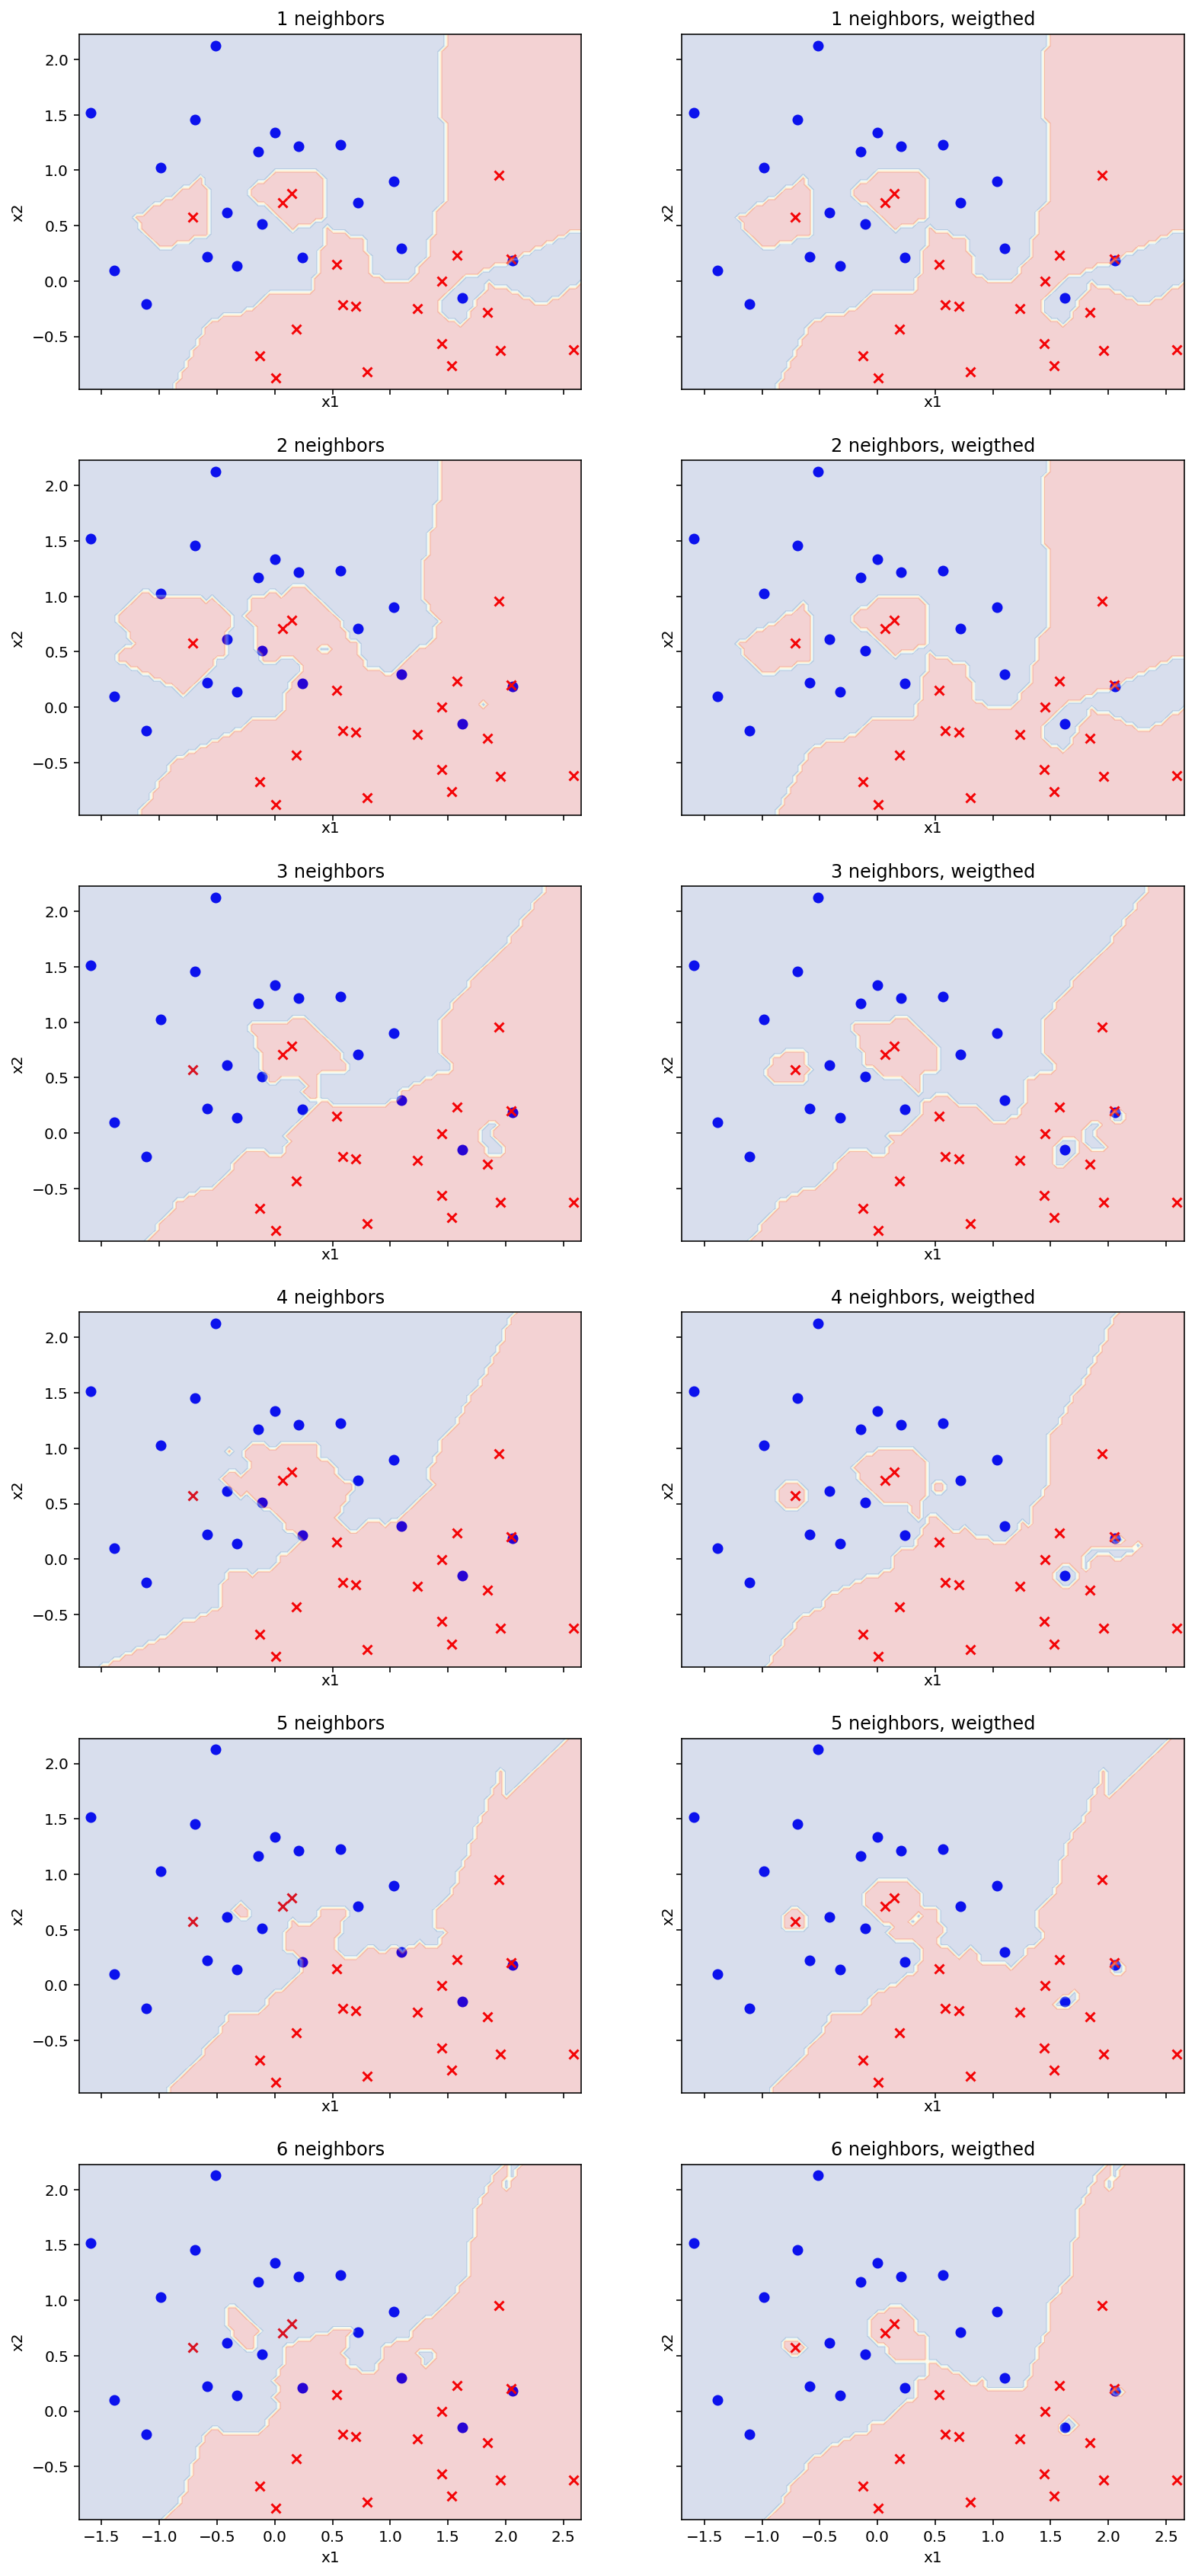

In [27]:
v_hh = [1,2,3,4,5,6]
fx,ax = plt.subplots(len(v_hh),2,sharex=True, sharey=True, figsize=(13,30))
cc=0
plot_step=0.05
x0 = x.copy()
x_min, x_max = x0[:, 0].min() - 0.1, x0[:, 0].max() + 0.1
y_min, y_max = x0[:, 1].min() - 0.1, x0[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

y1 = y.copy()
y1[y1==0] = -1
for cc,kk in enumerate(v_hh):
  clf = KNeighborsClassifier(n_neighbors=kk)
  clf.fit(x, -y1)
  draw_example(ax[cc][0],x,y)
  ax[cc][0].set_xlabel('x1')
  ax[cc][0].set_ylabel('x2')
  ax[cc][0].set_title("{0:d} neighbors".format(kk))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = ax[cc][0].contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.2)
  _ = ax[cc][0].set_ylim([y_min, y_max])

  clf = KNeighborsClassifier(n_neighbors=kk, weights='distance')
  clf.fit(x, -y1)
  draw_example(ax[cc][1],x,y)
  ax[cc][1].set_xlabel('x1')
  ax[cc][1].set_ylabel('x2')
  ax[cc][1].set_title("{0:d} neighbors, weigthed".format(kk))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = ax[cc][1].contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.2)
  _ = ax[cc][1].set_ylim([y_min, y_max])



## Regression with $k$NN

### Loss functions and risks 

**Loss functions** measure the cost resulting from predicting the target for a certain observation. The **error** is defined as the difference between the true value of the target($y$) and its estimation ($\hat{y}=f(\mathbf x)$). Some very common loss functions include

- Cuadratic cost $l(y, \hat{y}) = (y - \hat{y})^2$
- Absolute error $l(y, \hat{y}) = |y - \hat{y}|$

Both loss functions are similar in that the penalty for an exact estimation is zero. Their main differences are in the penalties in the case of *outliers*: larger errors get a much larger penalty with the cuadratic cost. Therefore, training algorithms that minimize the cuadratic cost make a stronger effort in improving the accuracy of the estimations with larger errors.




The **risk** of a regression model is the **expected value of its loss function**. The risk measures the quality of the estimations made with the model.

- **Mean squared error, MSE**: risk corresponding to the cuadratic cost loss
- **Mean absolute deviation, MAD** (or MAE from mean absolute error) is the risk that corresponds with the absolute error loss


### kNN for regression algorithm 

we use the $k$NN methodology to estimate a target $y_t$ for a test observation $\mathbf x_t$
- Find the $k$ nearest neighbors of $\mathbf x_t$ within the training set
- Retrieve the *targets* of the $k$ neighbors. 
- Compute $y_t$ as a function of the targets of the neighbors:
 - The **mean** of the neighboring targets
 - The **mean** of the targets of the $k$ neighbors **weighted** by their distance to $\mathbf x_t$
 - The **median** of the neighboring targets
 - The **mode** of the neighboring targets
 
 

The employed statistic depends on the **risk** that we want to optimize with the model:
 - To optimize the MSE we need to use the **mean**.
 - To optimize the MAE we need to use the **median** 
 - In cases where the targets are discrete (for instance natural numbers) the  **mode** can be a good choice to not assign targets outside the allowed range of values.

### Regression with $k$NN in `sklearn`

The use of this module is very similar to that of the classification one.

Sklearn regressors also implement the standard fundamental three methods:
- `fit`
- `predict`
- `score`: Evaluation of the model. In sklearn regression the *score* by defalut is the  $R^2$ statistic.
$$
R^2 = 1-\frac{\sum_{i=1}^{N_t}{(y_i-\hat{y}_i)^2}}{\sum_{i=1}^{N_t}{(y_i-\bar{y})^2}}
$$where $N_t$ is the length of the test set, $\hat{y}_i$, $i=1,\dots,N_t$ are the estimations made by the model, $y_i$ ($i=1,\dots,N_t$)  are the true targets and $\bar{y}=1/N_t\sum_{i=1}^{N_t}y_i$ is the average of the true targets-



#### $R^2$ interpretation
$R^2$ takes a maximum value of $1.0$ when the model makes an exact  (0 error) estimation of all the targets. The value of $R^2$ decreases as the estimation errors increase. 

The decrease in $R^2$ value is determined by the comparison between the accuracy of the model in the test set and that of a trivial model that would output as estimation for all the targets their mean value. 

If the model is not perfect ($R^2=0$) but better than the trivial one, then $0 < R^2 < 1$. If $R^2$ falls below 0 and takes negative values, it means that the estimations output by the model are worse than using the mean (trivial estimation). 

### Simple 1D regression problem

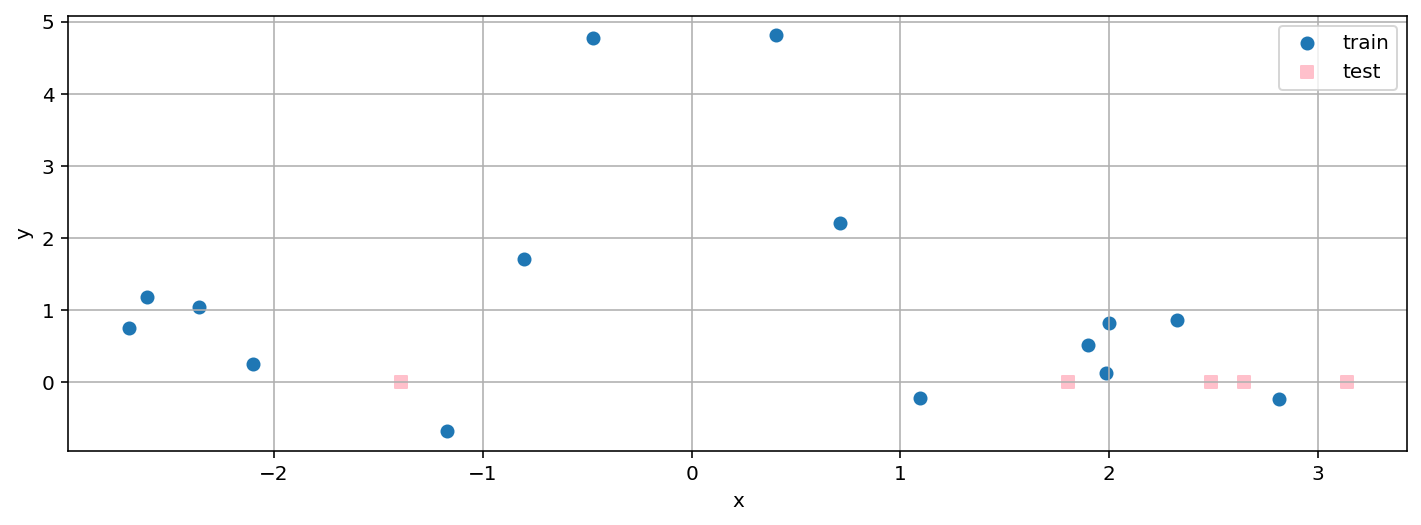

In [28]:

nn = 15
nt = 5
np.random.seed(142)
x_reg = np.sort(7*(np.random.random_sample(nn) - 0.5))
y_reg = 2*np.sin(np.pi*x_reg)/x_reg + 0.5*np.random.randn(nn)

xt_reg = np.sort(7*(np.random.random_sample(nt) - 0.5))
yt_reg = 2*np.sin(np.pi*xt_reg)/xt_reg + 0.5*np.random.randn(nt)

plt.figure(figsize=(12,4))
plt.scatter(x_reg,y_reg, label ='train')
plt.scatter(xt_reg, np.zeros(nt), marker='s', color='pink', label='test')
plt.grid()
plt.legend()
_=plt.xlabel('x')
_=plt.ylabel('y')


In [29]:

from sklearn.neighbors import KNeighborsRegressor

n_neighbors = 1
knn = KNeighborsRegressor(n_neighbors=n_neighbors)
knn.fit(x_reg.reshape(-1,1), y_reg)
risk_train = knn.score(x_reg.reshape(-1,1), y_reg)
risk_test = knn.score(xt_reg.reshape(-1,1), yt_reg)
pred_test = knn.predict(xt_reg.reshape(-1,1))
print("R^2 in the training set: {0:.2f}".format(risk_train))
print("R^2 in the test: {0:.2f}".format(risk_test))

R^2 in the training set: 1.00
R^2 in the test: 0.28


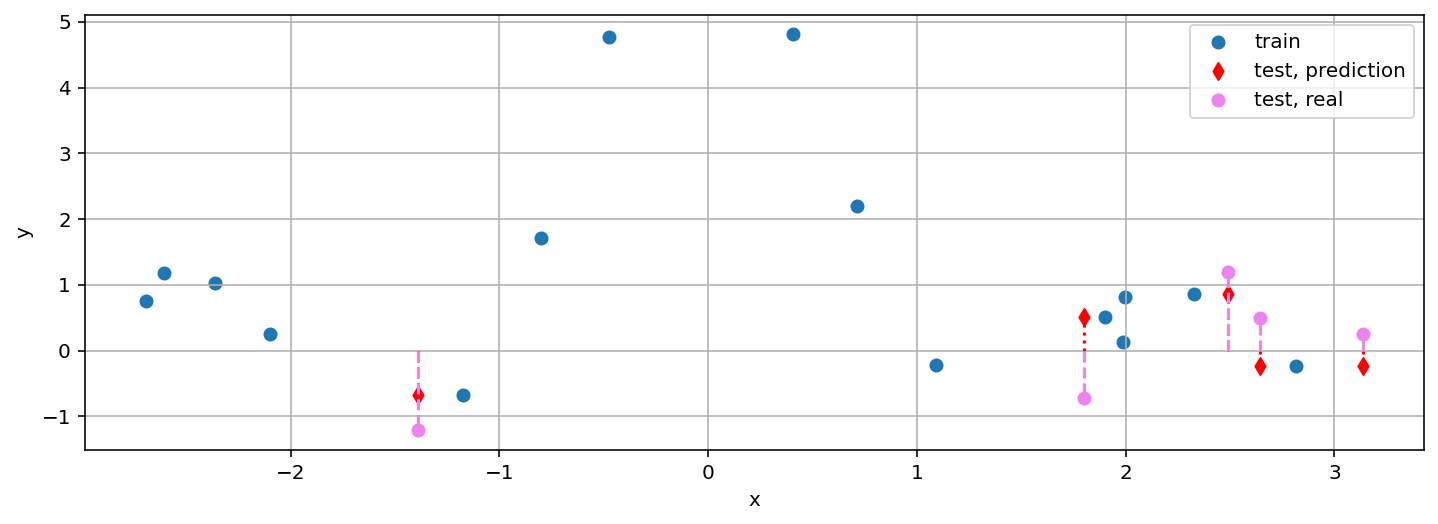

In [30]:
plt.figure(figsize=(12,4))
plt.scatter(x_reg,y_reg, label ='train')
#plt.scatter(xt_reg, np.zeros(nt), marker='s', color='pink', label='test ')
plt.scatter(xt_reg, pred_test, marker='d', color='red', label='test, prediction')
plt.scatter(xt_reg, yt_reg, marker='o', color='violet', label='test, real')
for xi,yi,yti in zip(xt_reg,pred_test,yt_reg):
  plt.plot([xi,xi],[0,yi], linestyle=':', color='red')
  plt.plot([xi,xi],[0,yti], linestyle='--', color='violet')
  
plt.grid()
plt.legend()
_=plt.xlabel('x')
_=plt.ylabel('y')


Plot the prediction for a wider range of values of $x$

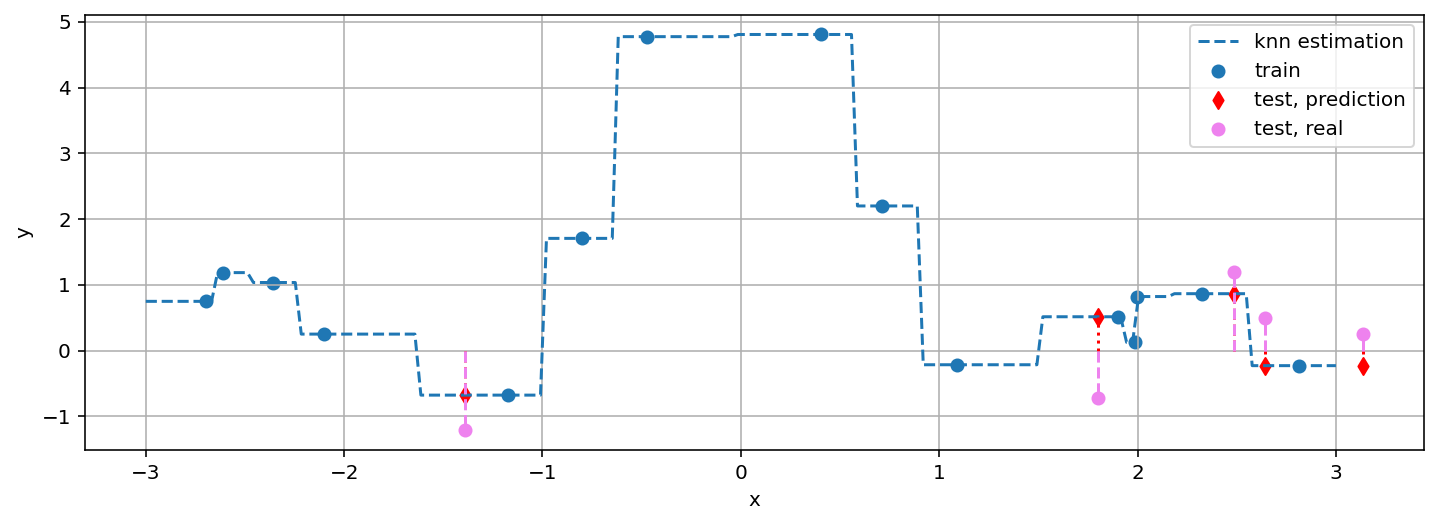

In [31]:
plt.figure(figsize=(12,4))
plt.scatter(x_reg,y_reg, label ='train')
xg = np.linspace(-3, 3, 200)
pg = knn.predict(xg.reshape(-1,1))
plt.plot(xg, pg, linestyle='--', label='knn estimation')
plt.scatter(xt_reg, pred_test, marker='d', color='red', label='test, prediction')
plt.scatter(xt_reg, yt_reg, marker='o', color='violet', label='test, real')
for xi,yi,yti in zip(xt_reg,pred_test,yt_reg):
  plt.plot([xi,xi],[0,yi], linestyle=':', color='red')
  plt.plot([xi,xi],[0,yti], linestyle='--', color='violet')
  
plt.grid()
plt.legend()
_=plt.xlabel('x')
_=plt.ylabel('y')

Dependence with the values of $k$


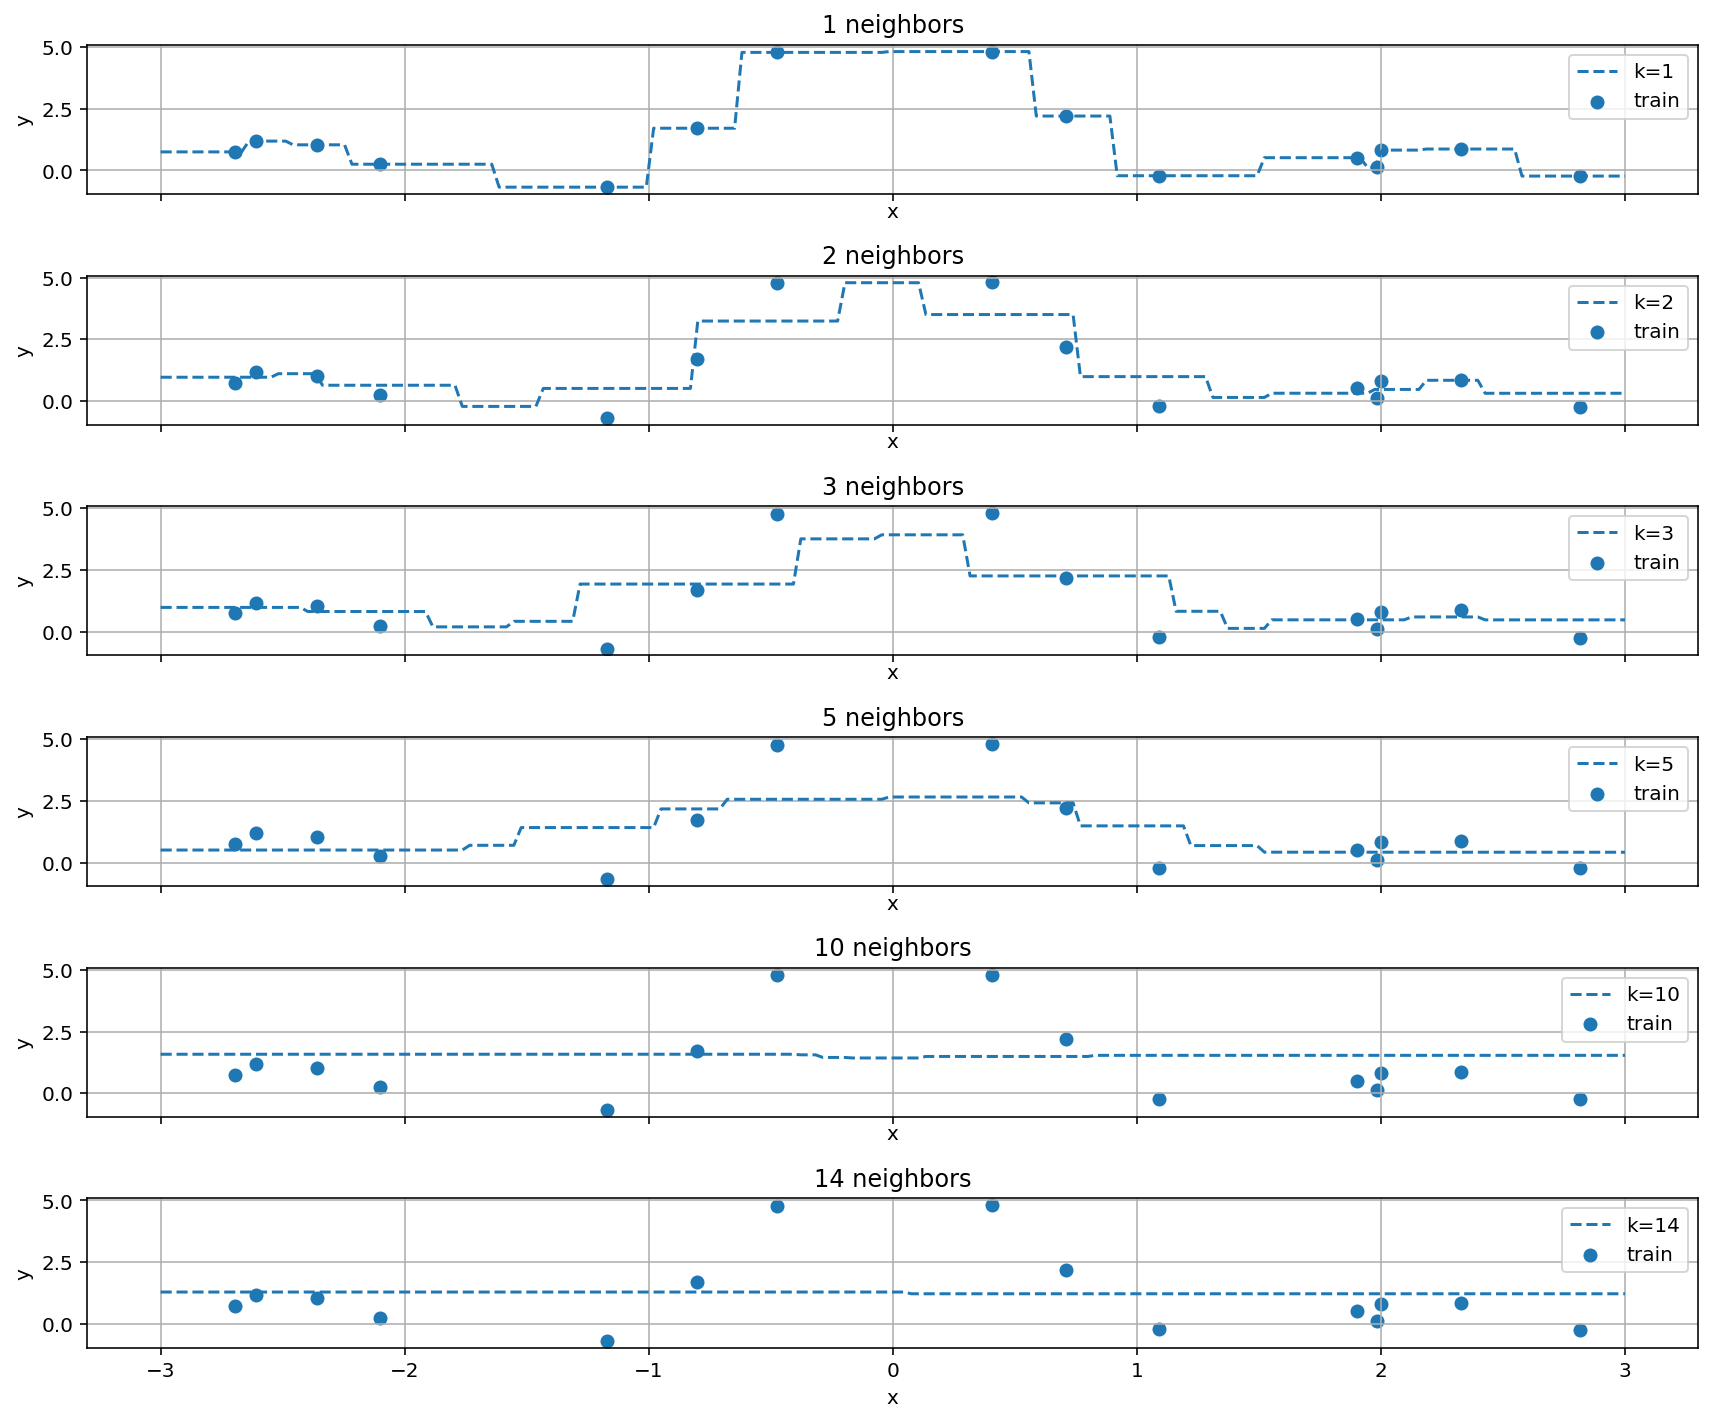

In [32]:
v_k = [1, 2, 3, 5, 10, 14]
ff,aa  = plt.subplots(len(v_k),1,figsize=(12,10), sharex=True, sharey=True)
for ik, k in enumerate(v_k):
  n_neighbors = k
  knn = KNeighborsRegressor(n_neighbors=n_neighbors)
  knn.fit(x_reg.reshape(-1,1), y_reg)
  pg = knn.predict(xg.reshape(-1,1))
  aa[ik].scatter(x_reg,y_reg, label ='train')
  aa[ik].plot(xg, pg, linestyle='--', label='k={0:d}'.format(k))
  aa[ik].grid()
  aa[ik].legend()
  _=aa[ik].set_xlabel('x')
  _=aa[ik].set_ylabel('y')
  _=aa[ik].set_title('{0:d} neighbors'.format(k))
ff.tight_layout()

### Weighting votes


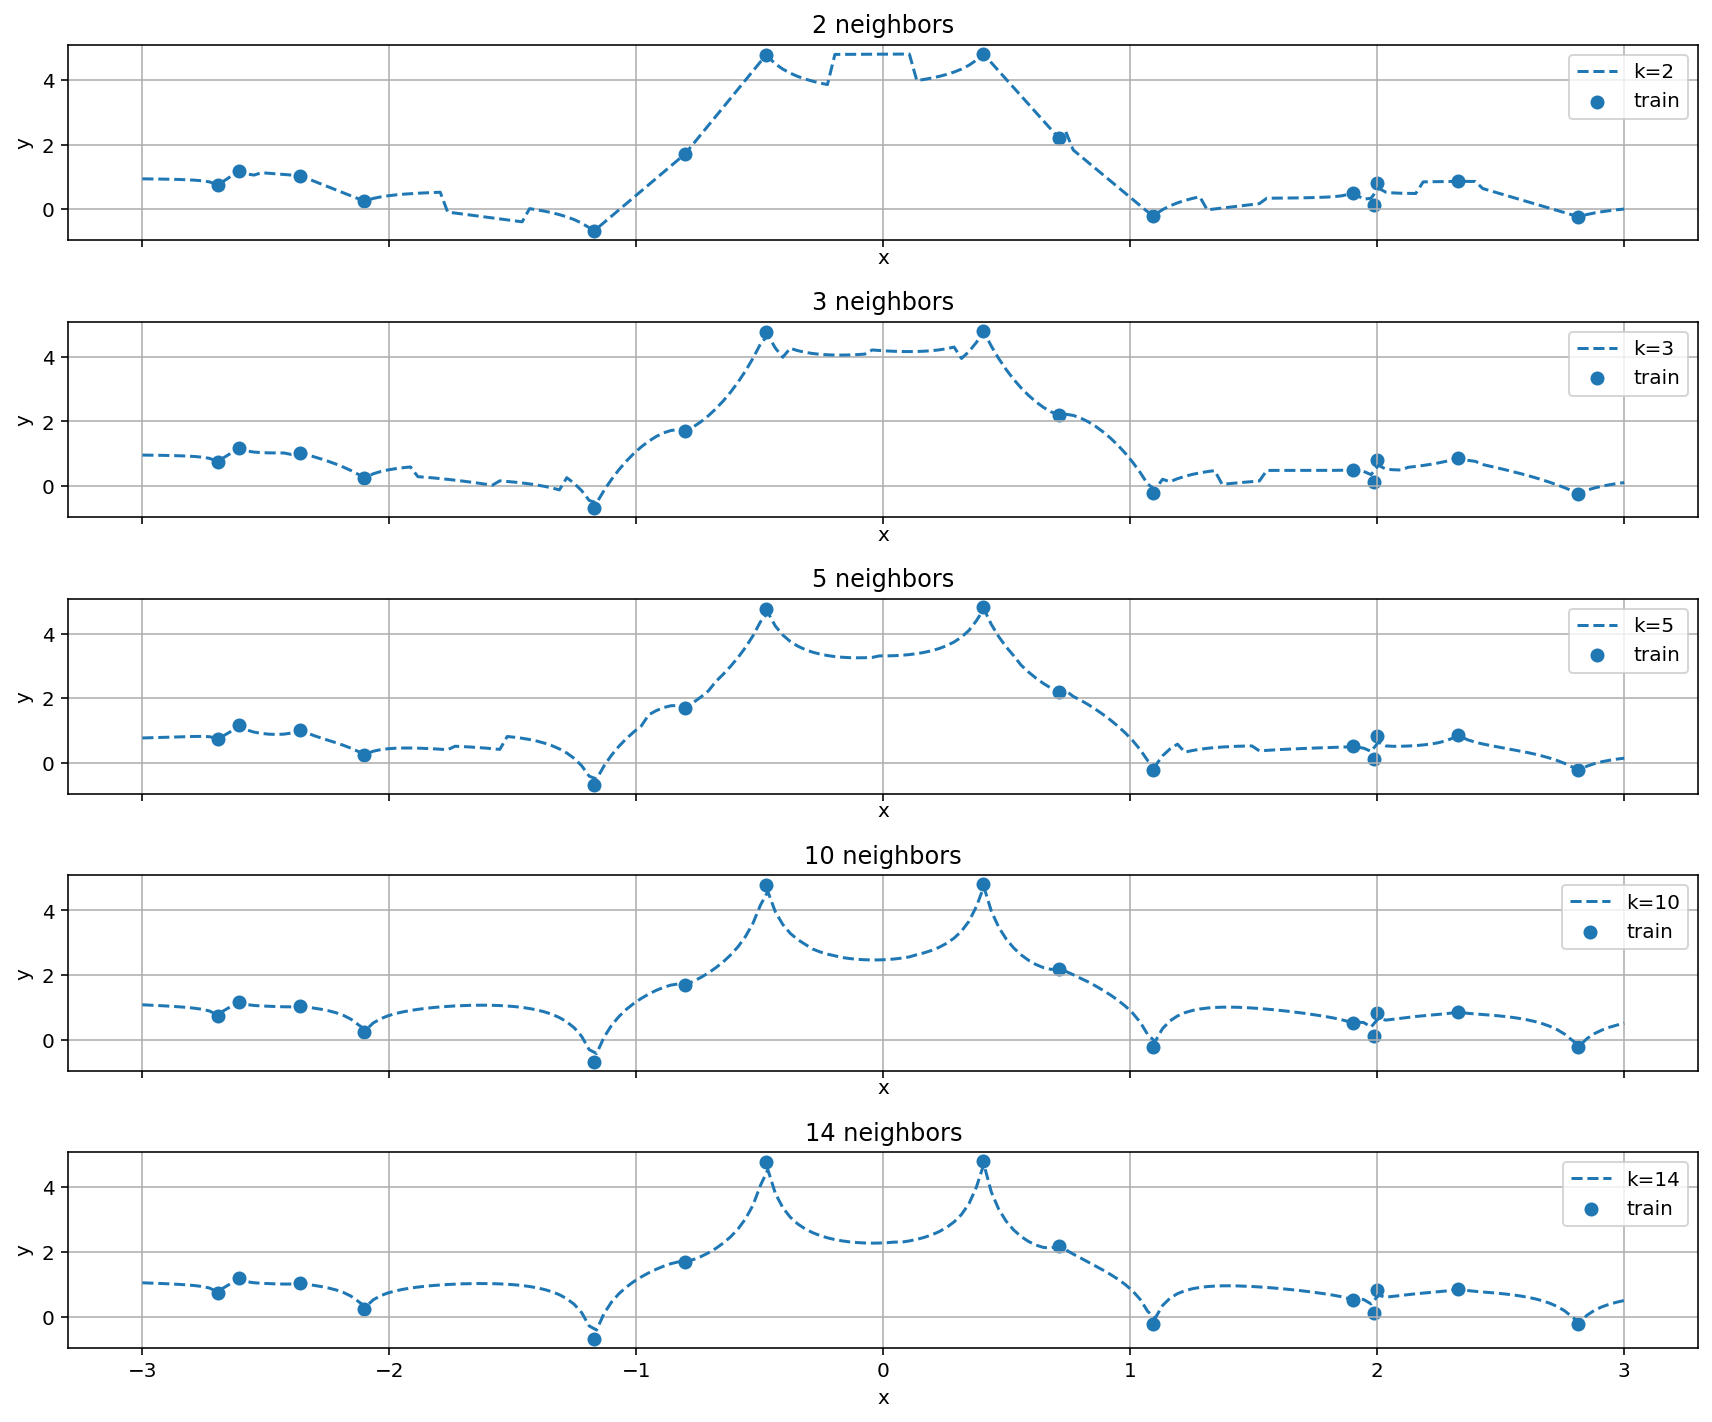

In [33]:
v_k = [2, 3, 5, 10, 14]
ff,aa  = plt.subplots(len(v_k),1,figsize=(12,10), sharex=True, sharey=True)
for ik, k in enumerate(v_k):
  n_neighbors = k
  knn = KNeighborsRegressor(n_neighbors=n_neighbors, weights='distance')
  knn.fit(x_reg.reshape(-1,1), y_reg)
  pg = knn.predict(xg.reshape(-1,1))
  aa[ik].scatter(x_reg,y_reg, label ='train')
  aa[ik].plot(xg, pg, linestyle='--', label='k={0:d}'.format(k))
  aa[ik].grid()
  aa[ik].legend()
  _=aa[ik].set_xlabel('x')
  _=aa[ik].set_ylabel('y')
  _=aa[ik].set_title('{0:d} neighbors'.format(k))
ff.tight_layout()

# Decision Trees

Build a **hierarchical structure** through a **recursive application** of stump classifiers.

## Stump Classifier 
- Binary classifier, that is, only two output classes.
 #treshhold to one or the other side
 
- Defined by a feature $v$, and a threshold $u_v$
$$
f_{s}(\mathbf x) = \left \{ \begin{array}{ll} \mbox{True} & \mbox{if } x_v \le u_v \\  \mbox{False} & \mbox{if } x_v > u_v \end{array} \right.
$$
- Divides the input space in two, those observations for which the threshold test is True and those for which the threshold test is False.

- To complete the classifier, one needs to assign one of the classes to each outcome of the threshold test. This is made so that the classification accuracy is maximised


### Toy example

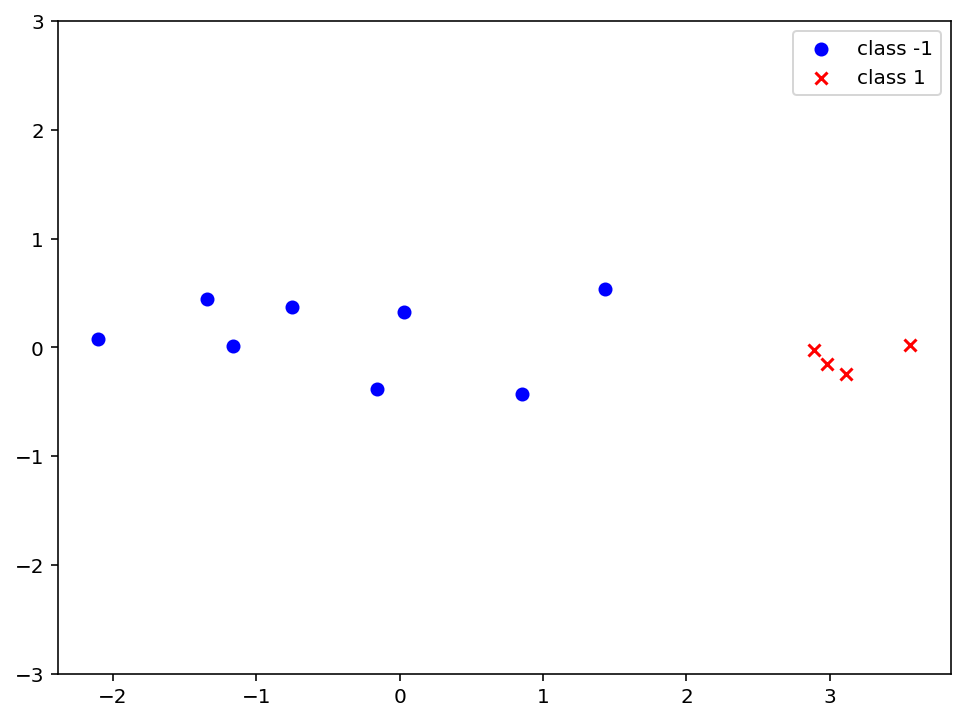

In [34]:
X1 = np.array([[-2.1 ,  0.08],
       [-1.16,  0.01],
       [-0.75,  0.37],
       [-1.34,  0.45],
       [-0.16, -0.38],
       [ 1.43,  0.54],
       [ 0.85, -0.43],
       [ 0.03,  0.33]])
X2 = np.array([[ 2.89, -0.02],
       [ 3.56,  0.02],
       [ 3.11, -0.24],
       [ 2.98, -0.15]])
n1 = X1.shape[0]
n2 = X2.shape[0]
X = np.vstack((X1,X2))
y = np.hstack((-np.ones(n1), np.ones(n2)))
ff,aa = plt.subplots(1,1,figsize=(8,6))
aa.scatter(X1[:,0],X1[:,1],marker='o', color='blue', label='class -1')
aa.scatter(X2[:,0],X2[:,1],marker='x', color='red', label='class 1')
_ = aa.set_ylim([-3,3])
_ = aa.legend()
plt.savefig('stump2d.png')

We are solving this problem using a very simple algorithm to train an stump classifier:

1. Randomly choose 4 thresholds per each feature
2. Determine the output class corresponding to each side of the threshold test as the majority class among all the observations that fall on that side of the test
3. Evaluate the classification error of each stump
4. Output as final classifier the stump with a smaller error

In [35]:
class stump(object):
    def __init__(self, v, u, x, y):
        self.v = v
        self.u = u
        cuales_izq = np.where(x[:,v] <= u)[0]
        if np.mean(y[cuales_izq]) < 0:
            self.y_izq = -1
        else:
            self.y_izq = 1
        cuales_dcha = np.where(x[:,v] > u)[0]
        if np.mean(y[cuales_dcha]) < 0:
            self.y_dch = -1
        else:
            self.y_dch = 1
    def predict(self, x):
        n = len(x)
        output = self.y_dch * np.ones(n)
        cuales_izq = np.where(x[:,self.v] <= self.u)[0]
        output[cuales_izq] = self.y_izq
        return output

In [36]:
n_stumps = 4
np.random.seed(42)
umbrales_1 = np.round(np.random.uniform(-2,3.5,size=n_stumps),2)
umbrales_2 = np.round(np.random.uniform(-0.4,0.5,size=n_stumps),2)

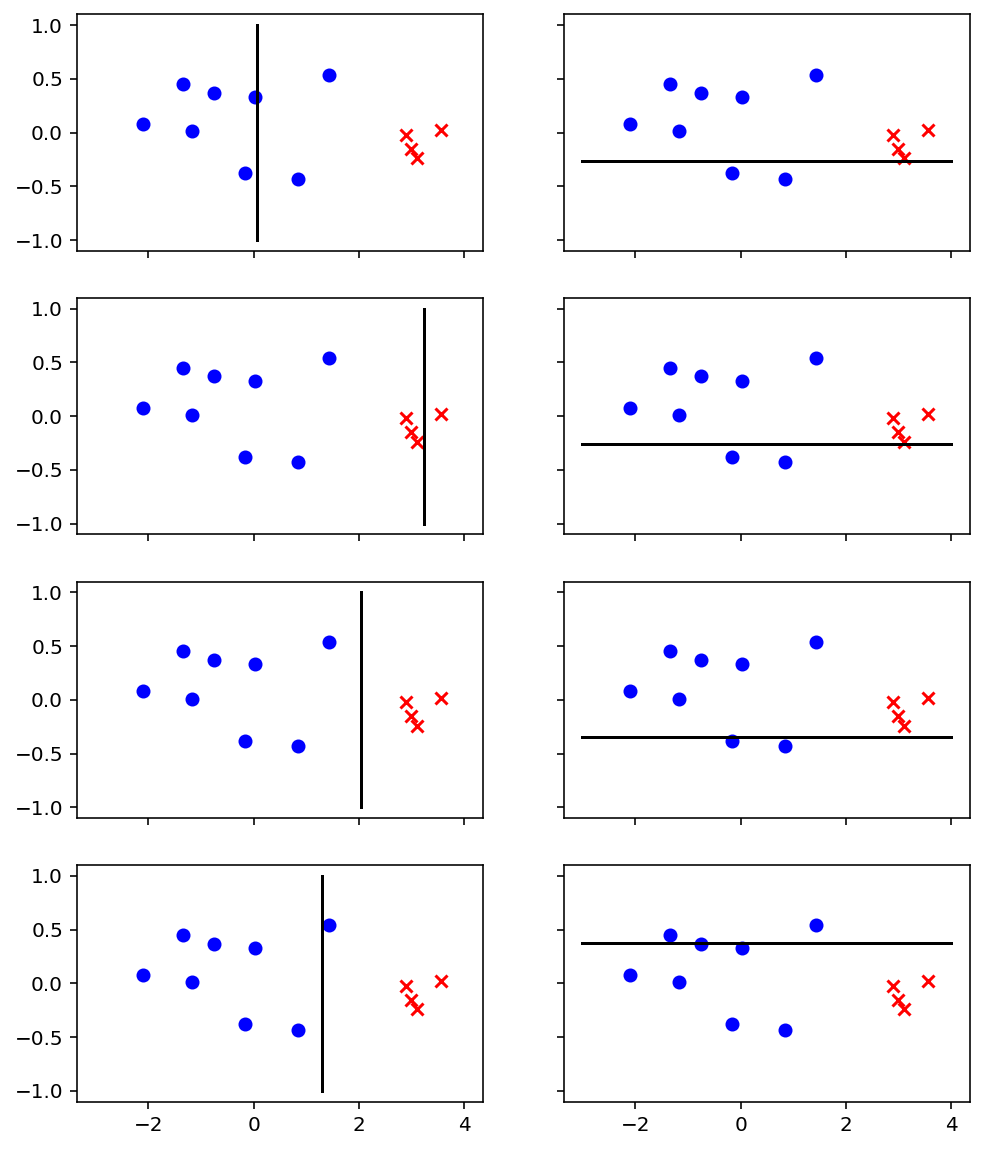

In [37]:
ff,aa = plt.subplots(n_stumps,2, sharex=True, sharey=True, figsize=(8,10))
for ss in range(n_stumps):
    aa[ss][0].scatter(X1[:,0],X1[:,1],marker='o', color='blue')
    aa[ss][0].scatter(X2[:,0],X2[:,1],marker='x', color='red')
    aa[ss][0].plot(umbrales_1[ss]*np.ones(2),
                  np.array([-1,1]), color='black')
    aa[ss][1].scatter(X1[:,0],X1[:,1],marker='o', color='blue')
    aa[ss][1].scatter(X2[:,0],X2[:,1],marker='x', color='red')
    aa[ss][1].plot(np.array([-3,4]), 
                   umbrales_2[ss]*np.ones(2),
                   color='black')

In [38]:
list_stumps = []
for ss in range(n_stumps):
    list_stumps.append(stump(v=0, u=umbrales_1[ss], x=X, y=y))
    list_stumps.append(stump(v=1, u=umbrales_2[ss], x=X, y=y))

In [39]:
aciertos = np.empty(len(list_stumps))
for iis,ss in enumerate(list_stumps):
    pred = ss.predict(X)
    aciertos[iis] = np.mean(pred==y)
    print("Stump {0:d}, if x[{1:d}] <= {2:.2f} then y={3:d} --> accuracy: {4:.1f}%".format(iis,
                                                                                          ss.v,
                                                                                          ss.u,
                                                                                          ss.y_izq,
                                                                                          aciertos[iis]*100. ))

Stump 0, if x[0] <= 0.06 then y=-1 --> accuracy: 83.3%
Stump 1, if x[1] <= -0.26 then y=-1 --> accuracy: 66.7%
Stump 2, if x[0] <= 3.23 then y=-1 --> accuracy: 75.0%
Stump 3, if x[1] <= -0.26 then y=-1 --> accuracy: 66.7%
Stump 4, if x[0] <= 2.03 then y=-1 --> accuracy: 100.0%
Stump 5, if x[1] <= -0.35 then y=-1 --> accuracy: 66.7%
Stump 6, if x[0] <= 1.29 then y=-1 --> accuracy: 91.7%
Stump 7, if x[1] <= 0.38 then y=-1 --> accuracy: 66.7%


In [40]:
best_s = np.argmax(aciertos)
print("Best classifier is Stump {0:d}".format(best_s))

Best classifier is Stump 4


## Tree construction
1. All starts with a **root node**, a node that holds all the observations in the training set
2.  Divide the root node into two **branch nodes** with a stump. Place the branch nodes in a list of branch nodes
3. Apply the following **recursion** to each branch node:
    1. If the branch node is  **homogeneous enough** it becomes a **leaf node**
        - the leaf node gets an output class (the majority class among all the training observations that arrived to this node) to classify with it all the observations that fall in it after travelling down the hierarchy
        - remove this node out from the branch nodes list
    2. If the branch node is **not pure** enough, it is divided with a stump and removed from the branch node list
    3. Also check some termination criteria that incorporate prior domain knowledge to the growing of the tree (more about this later)

## Using the tree to make predictions
1. The evaluation of each observation starts with the stump in the root node. The outcome of this test drives each observation through the corresponding branch node
2. The observation recursively travels down the hierarchy of the tree, guided by the stumps in the branch nodes 
3. The observation finishes its travel when it arrives to a leaf node. It then gets classified with the class of the leaf node.

## Optimization of the stumps
Imagine a node $h_0$ in the tree hierachy receives $N$ training observations with $d$ features from its parent node.

First you check that this set of $N$ observations is not homogeneous enough and therefore it has to be partitioned.

The stump that divides $h_0$ is optimized with a nested loop that runs per each feature $v=1,\dots,d$:

Repeat for each feature $v=1,\dots,d$:  
1. Sort all the observations by their values in the $v$th feature, $\mathbf x_{i,v}$.  
2. There are a maximum of $N-1$ different values for the threshold $u_v$
  - There are $N-1$ ways of separating the observations sorted along feature $v$ in two groups
  - If some feature has repeated values accross all the observations the number of possible thresholds will be less than $N-1$



3. Repeat for every possible  threshold in dimension $v$, $u_{v,j}$, $j=1,\dots,N-1$:  
    - Suppose $u_{v,j}$ divides node $h_0$ in two branch nodes  $h_1$ and $h_2$, and
        - $h_1$ gets $N_1$ of the $N$ observations that arrived at $h_0$ (those with $x_v \le u_{v,j}$), the majority class in these observations is $t_1$ and the impurity of the node is $G_1$
        - $h_2$ gets $N_2$ of the $N$ observations that arrived at $h_0$ (those with $x_v > u_{v,j}$), the majority class in these observations is $t_2$ and the impurity of the node is $G_2$
    - The impurity of test $u_{v,j}$ is then $\frac{N_1}{N}G_1 + \frac{N_2}{N}G_2$
4. Choose as stump to split  $h_0$ the test $u_{v,j}$ that achieves the least impurity score out of the $(N-1)\times d$ tried stumps.


## Impurity scores for classification
- Classification error rate
- **Gini Index**. In a problem with $K$ classes, we define $p_k$ as the fraction of observations in the node that belong to class $t_k$
  $$
  \mbox{Gini}=\sum_{k=1}^Kp_k(1-p_k)
  $$
- **Cross entropy**
  $$
  -\sum_{k=1}^Kp_k\log p_k
  $$
  
The next plot shows the values of these three scores in a problem with two classes.

Intuitively the Gini index or the cross entropy seem a better choice over the classification error since in cases in which two splits present a same classification error, they favor the split with a purer descendent.

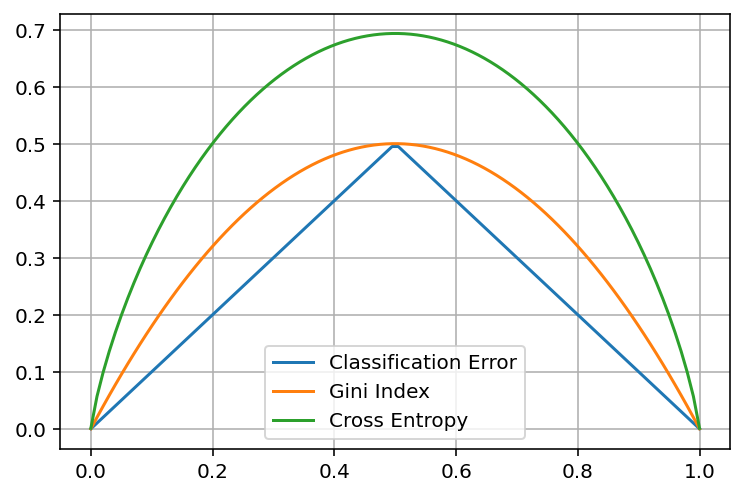

In [41]:
xx=np.linspace(1e-4,.9999,100)
error = np.min(np.vstack((xx,1-xx)),0)
gini = 2*xx*(1-xx)
entropia = -xx*np.log(xx)-(1-xx)*np.log(1-xx)
plt.figure()
plt.plot(xx,error,label='Classification Error')
plt.plot(xx,gini,label='Gini Index')
plt.plot(xx,entropia,label='Cross Entropy')
plt.legend()
plt.grid()
#plt.savefig('scores_stump.png')

## Implementation in sklearn

The class [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) includes the following parameters
- `criterion`: "gini" or "entropy"
- `splitter`: "best" or "random"
- `max_depth`: maximum depth of the tree
- `min_samples_split`: minimum number of samples required to split an internal node
- `min_samples_leaf`: minimum number of samples required to be at a leaf node
- `min_weight_fraction_leaf`: minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node
- `max_features`: number of features to consider when looking for the best split
- `max_leaf_nodes`: grow a tree with max_lef_nodes in  *best-first* fashion
- `min_impurity_decrease`: a node will be split if this split induces a decrease of the impurity greater than or equal to this value

- `class_weight`: weight of the errors in each class

# Parameters and hyperparameters

During the training of a machine learning model such as a decision tree on needs to find values for two kinds of parameters:
- **Fitable parameters**: The parameters that define each stump in the tree: the feature $v$ and the threshold $u_v$. Their values are adjusted during the optimization within the application of method `fit`
- **Hyperparameters**: They are set during the instantiation of the tree (method `__init__` executed within `DecisionTreeClassifier()`). Their role is to **condition** the optimization within `fit`. Their values are adjusted using prior domain knowledge. This way we control the **generalization capability of the tree**.

### Toy problem example

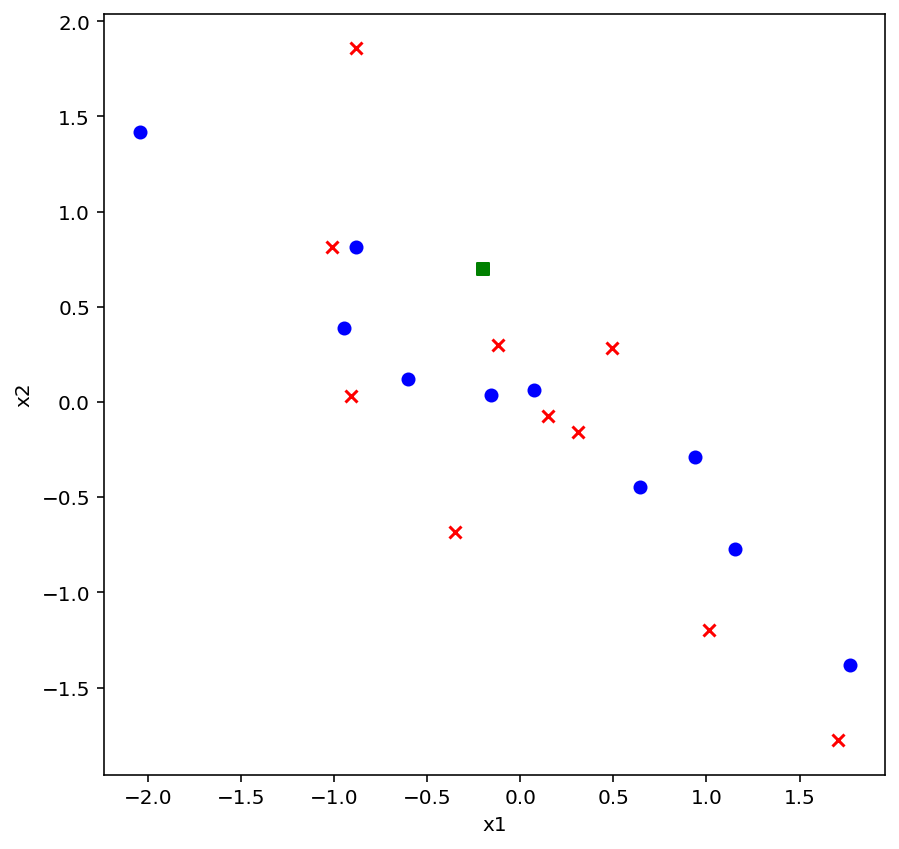

In [42]:
x,y = make_classification(n_samples=20, 
                          n_features=2,
                          n_informative=2, 
                          n_redundant=0,
                          n_repeated=0, 
                          n_classes=2, 
                          n_clusters_per_class=2,
                          weights=None, 
                          flip_y=0.01, 
                          class_sep=1.0, 
                          hypercube=False, 
                          shift=0.0, 
                          scale=1.0, 
                          shuffle=True, 
                          random_state=42)
xt = np.array([-0.2, 0.7])
fx,ax = plt.subplots(1,1,figsize=(7,7))
draw_example(ax,x,y,xt)
_=ax.set_xlabel('x1')
_=ax.set_ylabel('x2')
#plt.savefig("tree1.png")

In [1]:
from sklearn.tree import DecisionTreeClassifier,export_text
DT = DecisionTreeClassifier(max_leaf_nodes=6,random_state=42)
DT.fit(x, y)

import graphviz
from sklearn import tree
dot_Data = tree.export_graphviz(DT, 
                                out_file=None, 
                                feature_names = ['x1','x2'],
                               class_names=['blue','red'],
                                filled=True, 
                                rounded=True,  
                              special_characters=True)
graph = graphviz.Source(dot_Data)
graph

NameError: name 'x' is not defined

In [44]:
r = export_text(DT, feature_names=['x1','x2'])
print(r)

|--- x1 <= -1.53
|   |--- class: 0
|--- x1 >  -1.53
|   |--- x1 <= 0.57
|   |   |--- x2 <= 0.03
|   |   |   |--- class: 1
|   |   |--- x2 >  0.03
|   |   |   |--- x2 <= 0.20
|   |   |   |   |--- class: 0
|   |   |   |--- x2 >  0.20
|   |   |   |   |--- class: 1
|   |--- x1 >  0.57
|   |   |--- x2 <= -0.99
|   |   |   |--- class: 1
|   |   |--- x2 >  -0.99
|   |   |   |--- class: 0



#### Classification boundaries

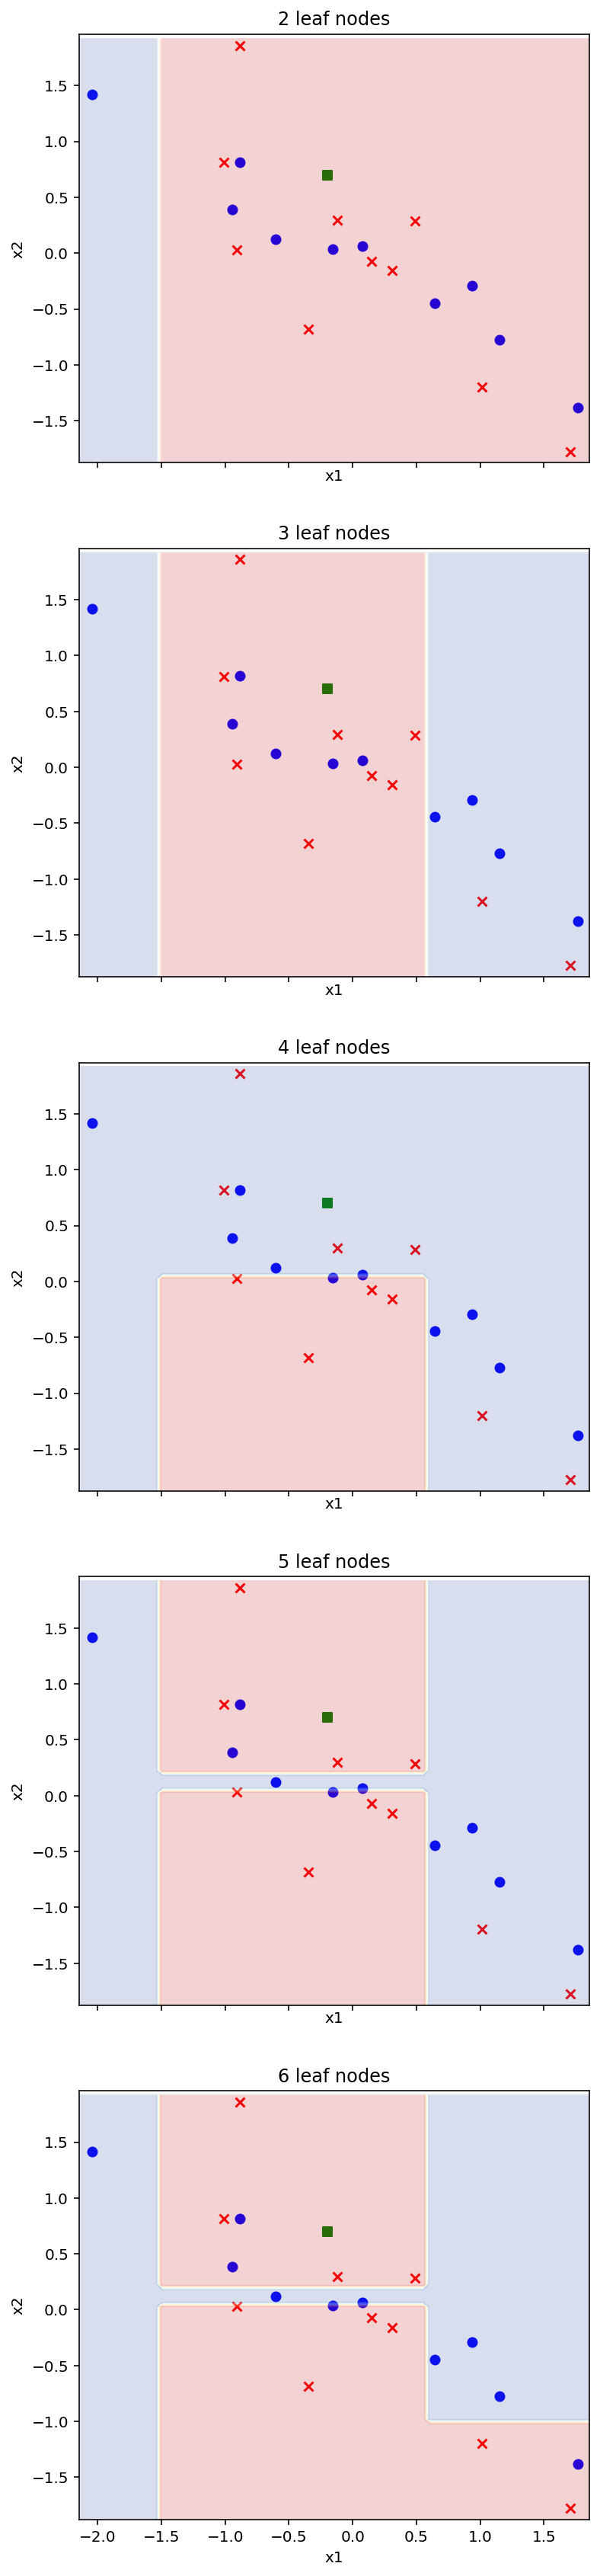

In [45]:
fx,ax = plt.subplots(5,1,sharex=True, sharey=True, figsize=(6,30))
cc=0
plot_step=0.05
x0 = x.copy()
x_min, x_max = x0[:, 0].min() - 0.1, x0[:, 0].max() + 0.1
y_min, y_max = x0[:, 1].min() - 0.1, x0[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
v_hh = [2,3,4,5,6]
y1 = y.copy()
y1[y1==0] = -1
for cc in range(5):
  DT = DecisionTreeClassifier(max_leaf_nodes=v_hh[cc],random_state=42)
  DT.fit(x, -y1)
  draw_example(ax[cc],x,y,xt)
  ax[cc].set_xlabel('x1')
  ax[cc].set_ylabel('x2')

  Z = DT.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = ax[cc].contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.2)
  _ = ax[cc].set_ylim([y_min, y_max])
  _ = ax[cc].set_title("{0:d} leaf nodes".format(v_hh[cc]))

## Decision Trees for Regression

The hierarchical structure of the decision tree can be easily adapted to solve regression problems by just changing the impurity score in the stumps.

### Impurity scorse for regression
- **Mean squared error** (MSE). Each leaf node outputs a target equal to the **average** of the targets of those training observations that ended up in this leaf during the growing of the tree.
- **Mean absolute error** (MAE). The output will be the  **median** of each leaf node.

### Optimization of the stumps in the regression case

Basically follow the same algorithm than in the classification case.

Imagine a node $h_0$ in the tree hierachy receives $N$ training observations with $d$ features from its parent node. The stump that splits $h_0$ is optimized with a nested loop that runs per each feature $v=1,\dots,d$:


Repeat for each feature $v=1,\dots,d$:  
1. Sort all the observations by their values in the $v$th feature, $\mathbf x_{i,v}$.  
2. There are a maximum of $N-1$ different values for the threshold $u_v$
  - There are $N-1$ ways of separating the observations sorted along feature $v$ in two groups
  - If some feature has repeated values accross all the observations the number of possible thresholds will be less than $N-1$






3. Repeat for every possible  threshold in dimension $v$, $u_{v,j}$, $j=1,\dots,N-1$:  
    - Suppose $u_{v,j}$ divides node $h_0$ in two branch nodes  $h_1$ and $h_2$, and
        - $h_1$ gets $N_1$ of the $N$ observations that arrived at $h_0$ (those with $x_v \le u_{v,j}$), the majority class in these observations is $t_1$ and the impurity of the node is $G_1$
        - $h_2$ gets $N_2$ of the $N$ observations that arrived at $h_0$ (those with $x_v > u_{v,j}$), the majority class in these observations is $t_2$ and the impurity of the node is $G_2$

        - If the impurity measure to optimize is the **MSE** (**MAE**):
          - node $h_i$ ($ i= 1,2 $) gets as target the average (median) of the targets of its $N_i$ observations 
          - the impurity of node $h_i$ $G_i$ is the MSE (MAE) of estimating the targets of its $N_i$ observations with their mean (median)
    - The impurity of test $u_{v,j}$ is then $\frac{N_1}{N}G_1 + \frac{N_2}{N}G_2$

4. Choose as stump to split  $h_0$ the test $u_{v,j}$ that achieves the minimum impurity score out of the $(N-1)\times d$ tried stumps.

### Toy example

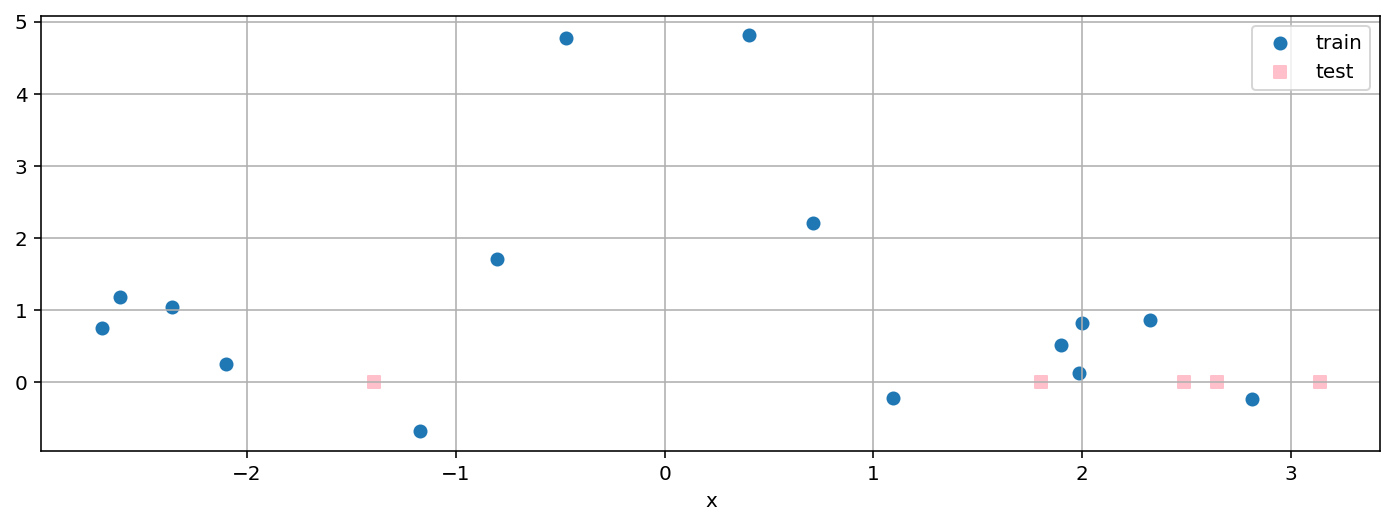

In [46]:
nn = 15
nt = 5
np.random.seed(142)
x_reg = np.sort(7*(np.random.random_sample(nn) - 0.5))
y_reg = 2*np.sin(np.pi*x_reg)/x_reg + 0.5*np.random.randn(nn)

xt_reg = np.sort(7*(np.random.random_sample(nt) - 0.5))
yt_reg = 2*np.sin(np.pi*xt_reg)/xt_reg + 0.5*np.random.randn(nt)

plt.figure(figsize=(12,4))
plt.scatter(x_reg,y_reg, label ='train')
plt.scatter(xt_reg, np.zeros(nt), marker='s', color='pink', label='test')
plt.grid()
plt.legend()
_=plt.xlabel('x')

In [47]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_leaf_nodes=3)
DT.fit(x_reg.reshape(-1,1), y_reg.reshape(-1,1))
train_risk = DT.score(x_reg.reshape(-1,1), y_reg.reshape(-1,1))
test_risk = DT.score(xt_reg.reshape(-1,1), yt_reg.reshape(-1,1))
pred_test = DT.predict(xt_reg.reshape(-1,1))
print("R^2 en el conjunto de entrenamiento: {0:.2f}".format(train_risk))
print("R^2 en el conjunto de test: {0:.2f}".format(test_risk))

R^2 en el conjunto de entrenamiento: 0.76
R^2 en el conjunto de test: -0.50


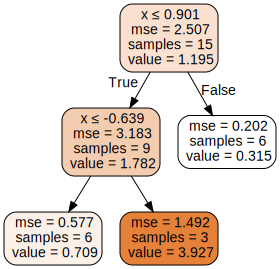

In [48]:
dot_Data = tree.export_graphviz(DT, 
                                out_file=None, 
                                feature_names = ['x'],
                                filled=True, 
                                rounded=True,  
                              special_characters=True)
graph = graphviz.Source(dot_Data)
graph

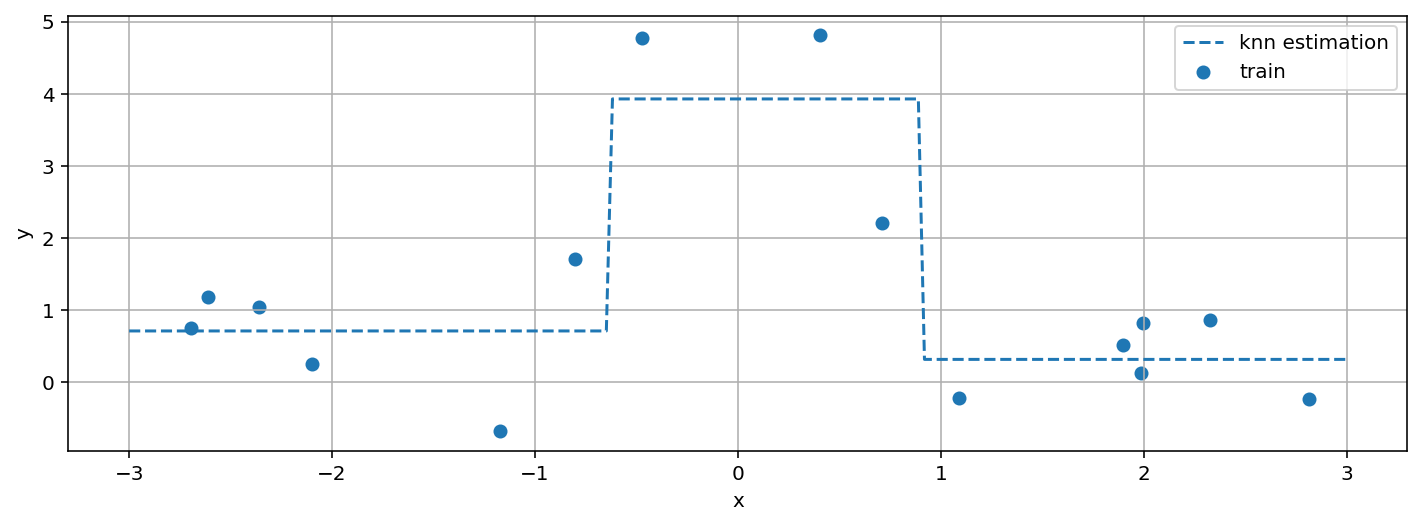

In [49]:
plt.figure(figsize=(12,4))
plt.scatter(x_reg,y_reg, label ='train')
xg = np.linspace(-3, 3, 200)
pg = DT.predict(xg.reshape(-1,1))
plt.plot(xg, pg, linestyle='--', label='knn estimation')
plt.grid()
plt.legend()
_=plt.xlabel('x')
_=plt.ylabel('y')

#### Dependence with the number of leaf nodes

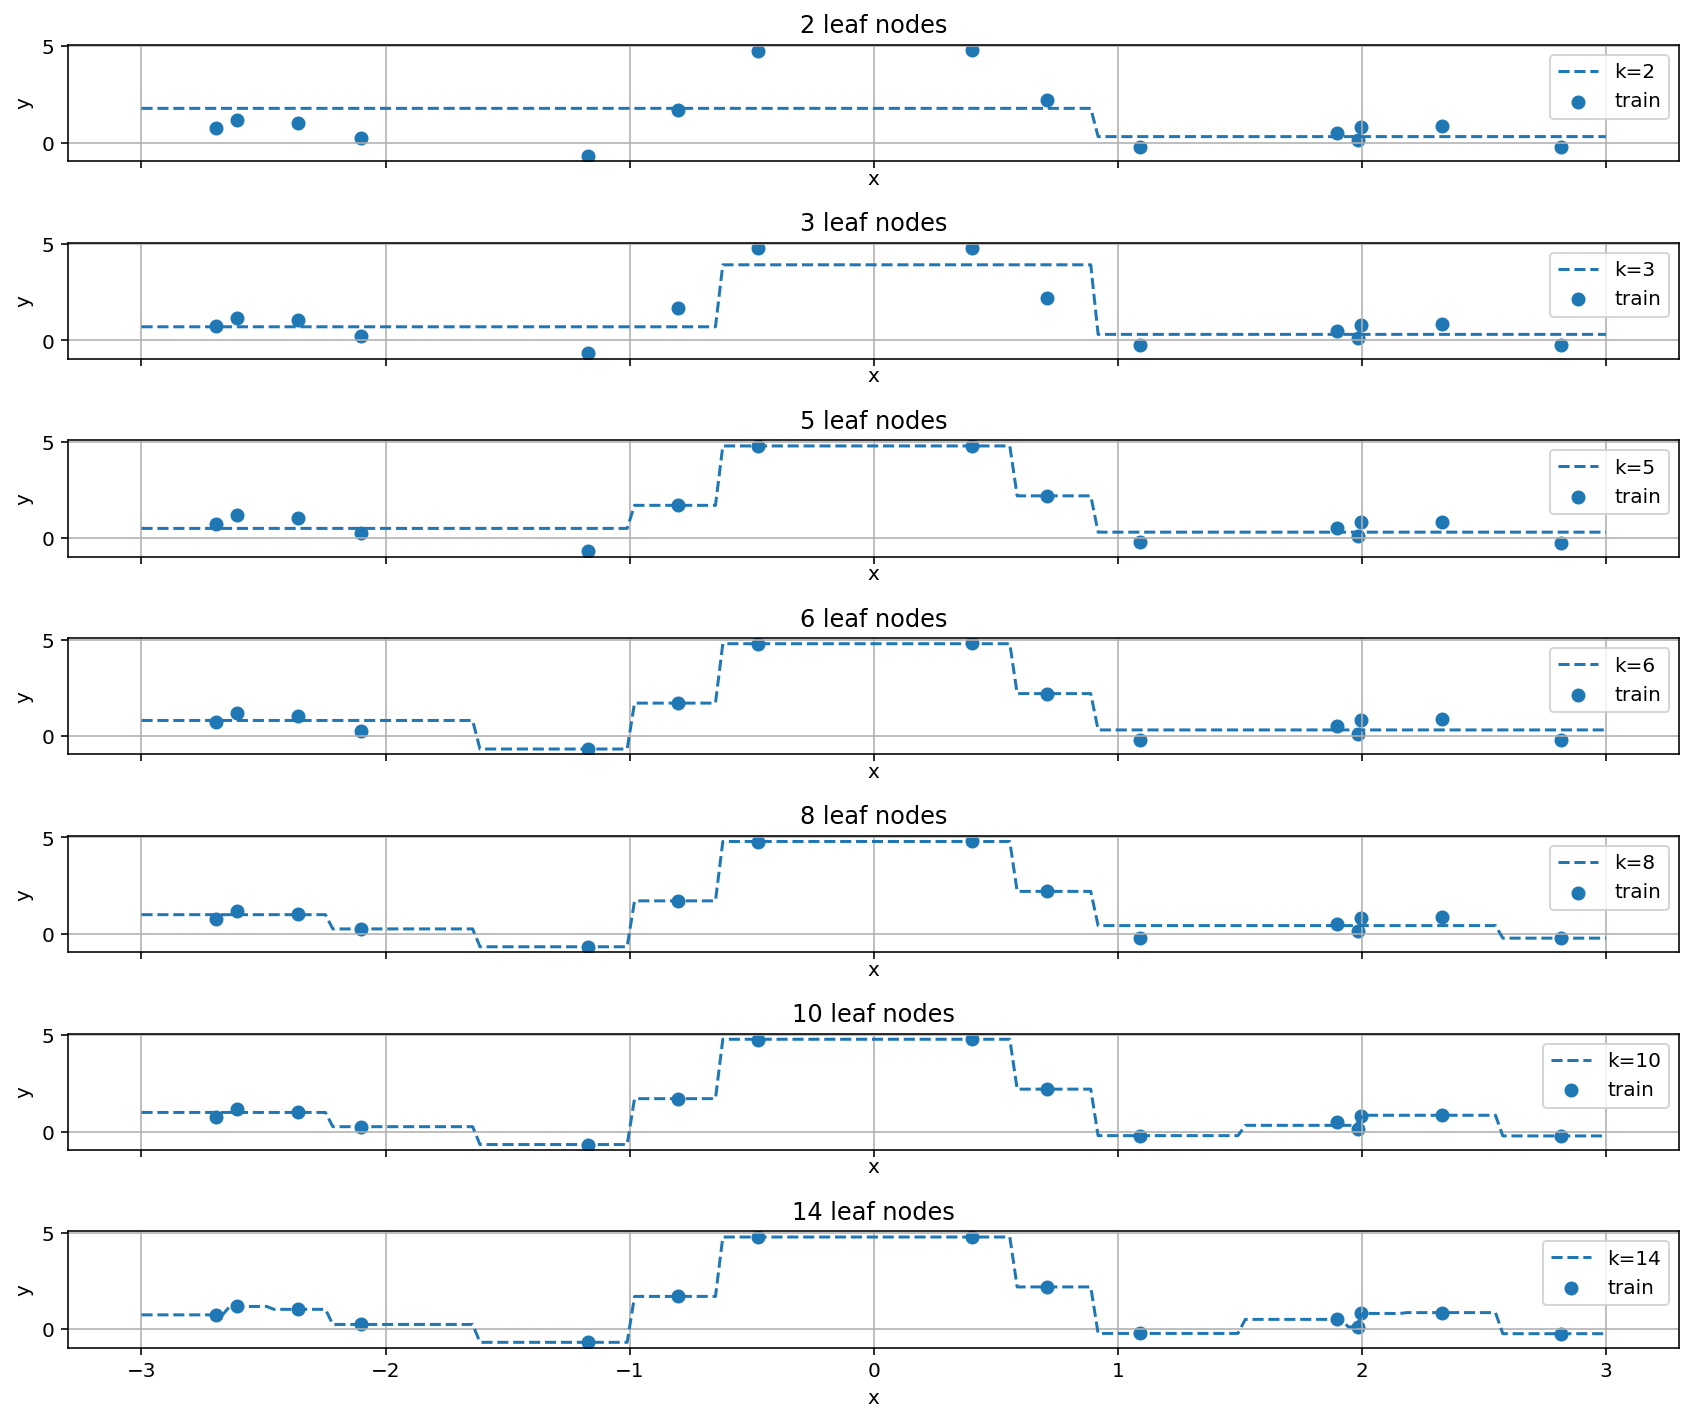

In [50]:
v_k = [2, 3, 5, 6, 8, 10, 14]
ff,aa  = plt.subplots(len(v_k),1,figsize=(12,10), sharex=True, sharey=True)
for ik, k in enumerate(v_k):
  DT = DecisionTreeRegressor(max_leaf_nodes=k)
  DT.fit(x_reg.reshape(-1,1), y_reg)
  pg = DT.predict(xg.reshape(-1,1))
  aa[ik].scatter(x_reg,y_reg, label ='train')
  aa[ik].plot(xg, pg, linestyle='--', label='k={0:d}'.format(k))
  aa[ik].grid()
  aa[ik].legend()
  _=aa[ik].set_xlabel('x')
  _=aa[ik].set_ylabel('y')
  _=aa[ik].set_title('{0:d} leaf nodes'.format(k))
ff.tight_layout()

## Advantages and limitations of trees
- :o) Serve for classification and regression in a natural way
- :o) Binary stumps, even in multiclass classification or with categorical features, help control the trade-off between generalization and learning capacity
- :o) Easy to explain (not so easy to interpret, unless the number of nodes is small)
- :o) Easy and cheap to evaluate
- :o( Difficulties in problems where the classification boundaries are not parallel to the axis
- :o( Optimization proceeds in a greedy fashion, the branch nodes closer to the root are critical 
- :o( Trade-off between training set size and number of features. As the growing of the tree proceeds, branch nodes receive less and less observations to learn their splits. If the number of features is comparable to the training set size we might end up with a lot of leaf nodes that have a single observation.


# Random Forests

## Ensemble methods

A common way of developing robust machine learning models is to learn an **ensemble** of models with a same training set but introducing a small amount of **diversity** in each member of the ensemble:
- **subsampling** the common training set to get a somehow different set for every learner
- using different hyperparameters (maybe choosen at random) for every learner.  




Once the ensemble is built, the prediction for each test observation is made by combining all the individual predictions contributed by the members of the ensemble:
- Taking the average of the individual predictions
- Taking the mode of the individual predictions
- Weighting each individual learner prediction by a coefficient that captures the confidence on this learner predictions.


## Random Forests for classification and regression

Random Forest form an ensemble by growing $B$ decision trees. This method can be used for both classification or regression tasks by just instantiating the corresponding decision trees in each case. 

The algorithm basically consists in a loop that runs an interation for each tree in the forest ($B$ iterations). The algorithm received as input a training set with $N$ observations in $d$ dimensions, with their corresponding targets, and a **forest size** $B$.



For $b=1,\dots,B$:

1. Choose at random a subset of $N_b$ observations of the training set
2. Learn tree $T_b$ with this training set of size $N_b$ but with this modification in the standard tree growing algorithm:
   - Before optimizing every stump for every branch node, choose at random $m_b$ features from the available $d$. This way, each node only access a subset of the input features to optimize its stump, what intoduces further diversity in the growing of the forest
3. Inference. A target for each test observation is output by each tree in the forest. The final target output by the forest is
    - in regression forests, the average of the  $B$ predictions
    - in classification forests, the most voted class

## Sklearn implementation of Random Forest 

The module with the implementation of Random Forest for classification is [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), while the implementation for regression is [`sklearn.ensemble.RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

Some of the hyperparameters that can help control the generalization capability of each tree and of the overall forest:
- `n_estimators`: Size of the forest
- `bootstrap`: Use all the training observations with each tree or just a subset
- `max_samples`: if `bootstrap` is `True` then this is an upper limit to the number of samples that will be used to grow each tree

### Toy dataset example of classification

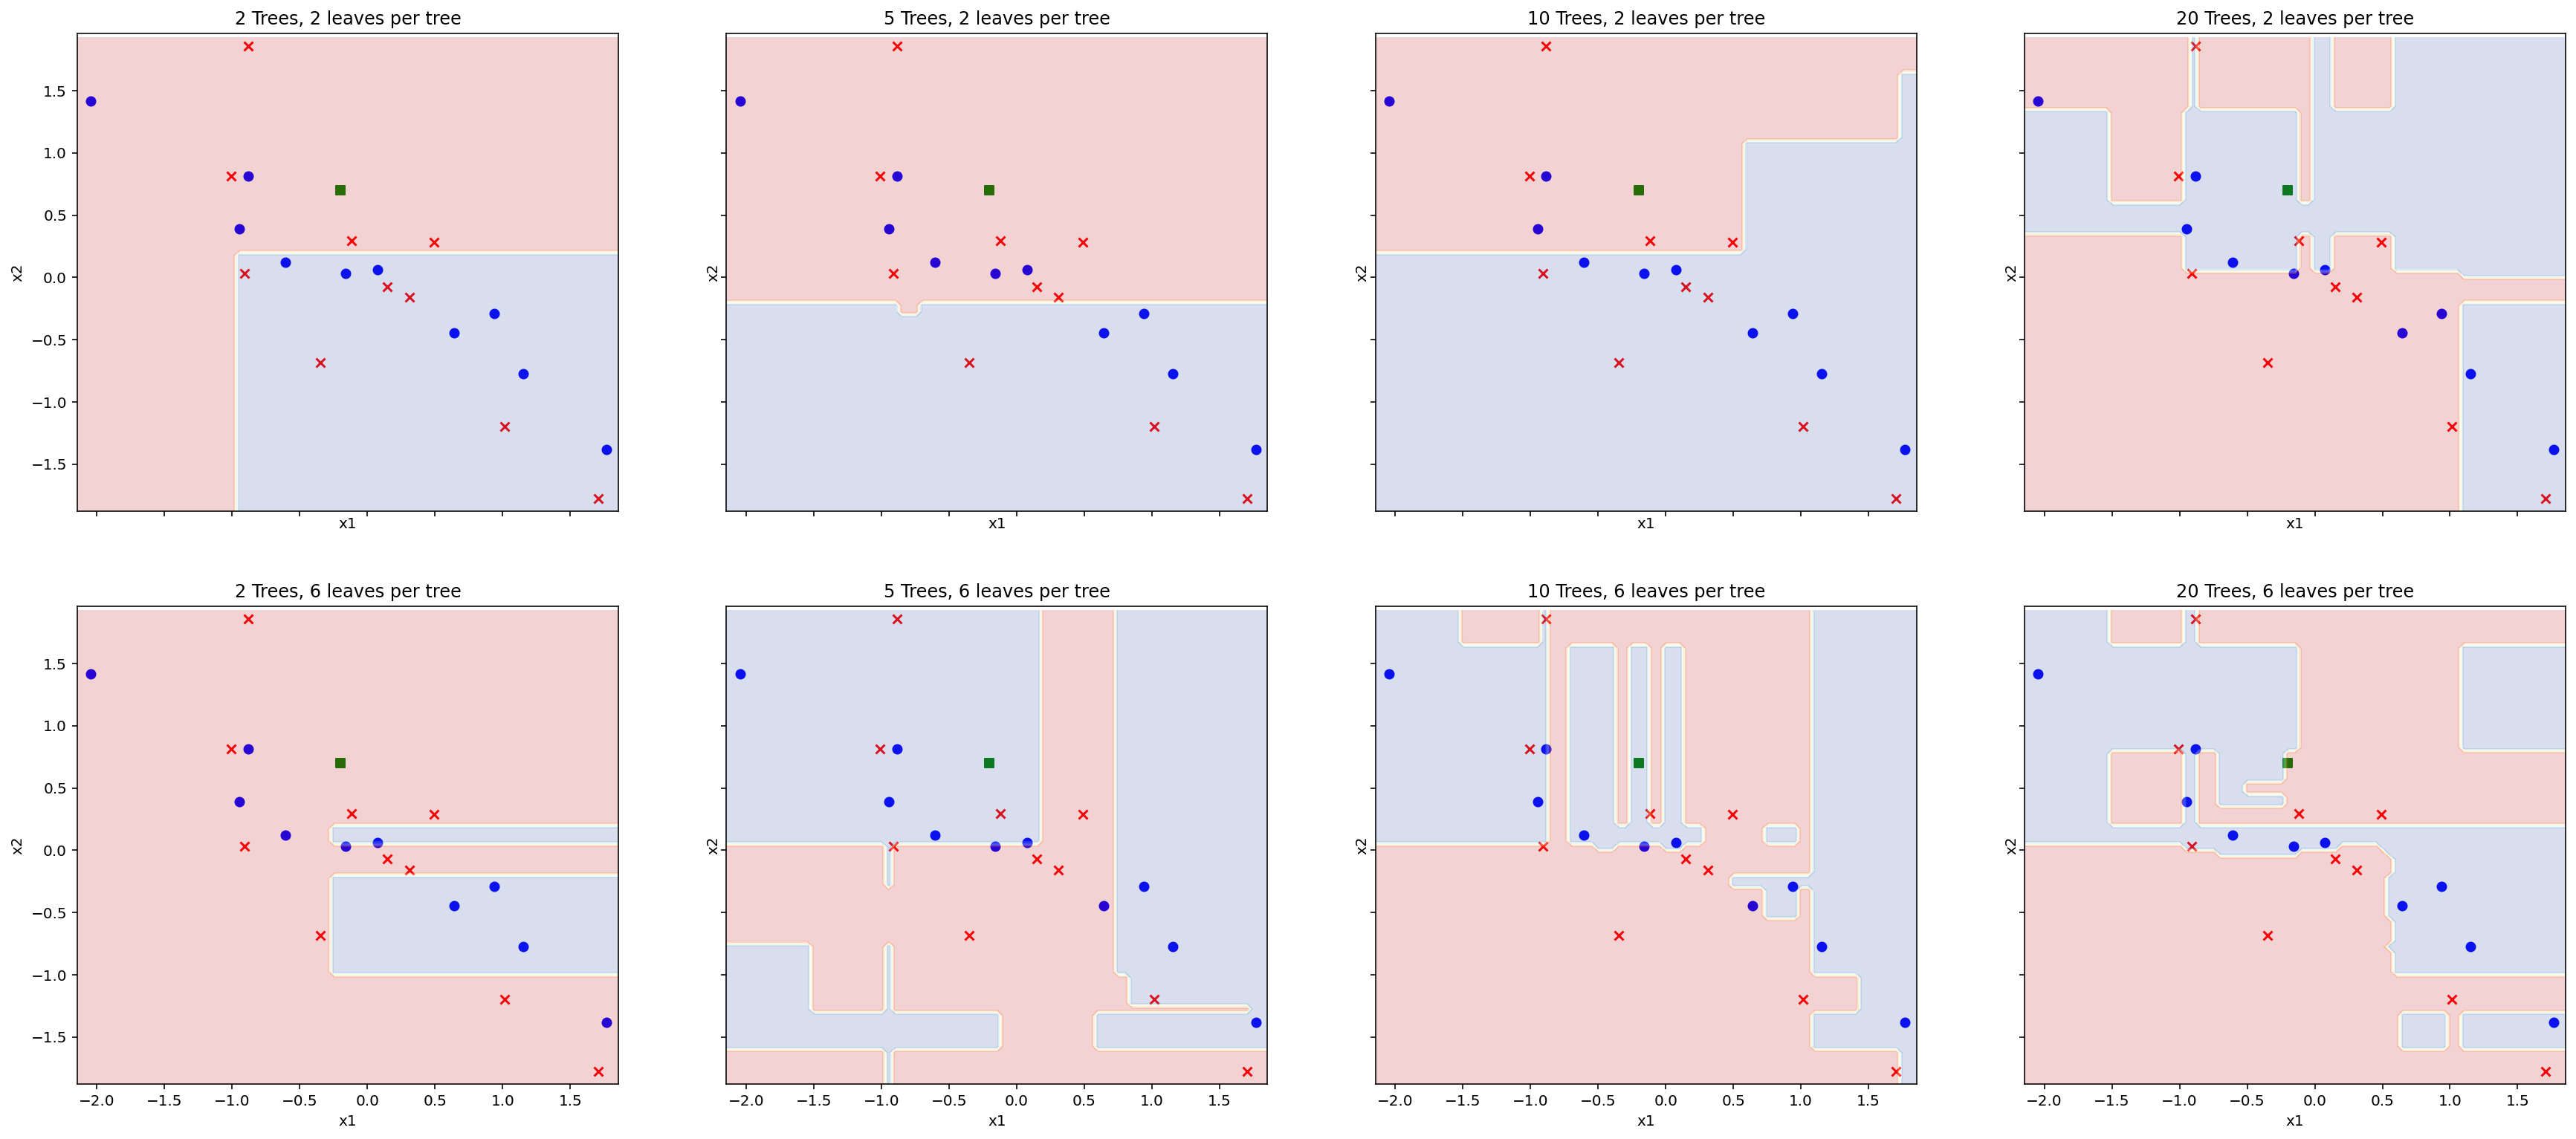

In [51]:
from sklearn.ensemble import RandomForestClassifier
v_hh = [2,5,10,20]
fx,ax = plt.subplots(2,len(v_hh),sharex=True, sharey=True, figsize=(30,13))
cc=0
plot_step=0.05
x_min, x_max = x0[:, 0].min() - 0.1, x0[:, 0].max() + 0.1
y_min, y_max = x0[:, 1].min() - 0.1, x0[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

y1 = y.copy()
y1[y1==0] = -1
for cc,kk in enumerate(v_hh):
  hojas=2
  clf = RandomForestClassifier(max_leaf_nodes=hojas,
                       n_estimators=kk)
  clf.fit(x, -y1)
  draw_example(ax[0][cc], x,y,xt)
  ax[0][cc].set_xlabel('x1')
  ax[0][cc].set_ylabel('x2')
  ax[0][cc].set_title("{0:d} Trees, {1:d} leaves per tree".format(kk, hojas))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = ax[0][cc].contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.2)
  _ = ax[0][cc].set_ylim([y_min, y_max])

  hojas=6
  clf = RandomForestClassifier(max_leaf_nodes=hojas,
                       n_estimators=kk)
  clf.fit(x, -y1)
  draw_example(ax[1][cc], x,y,xt)
  ax[1][cc].set_xlabel('x1')
  ax[1][cc].set_ylabel('x2')
  ax[1][cc].set_title("{0:d} Trees, {1:d} leaves per tree".format(kk, hojas))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = ax[1][cc].contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.2)
  _ = ax[1][cc].set_ylim([y_min, y_max])
    
plt.savefig('RF.png')

## Toy dataset example of regression

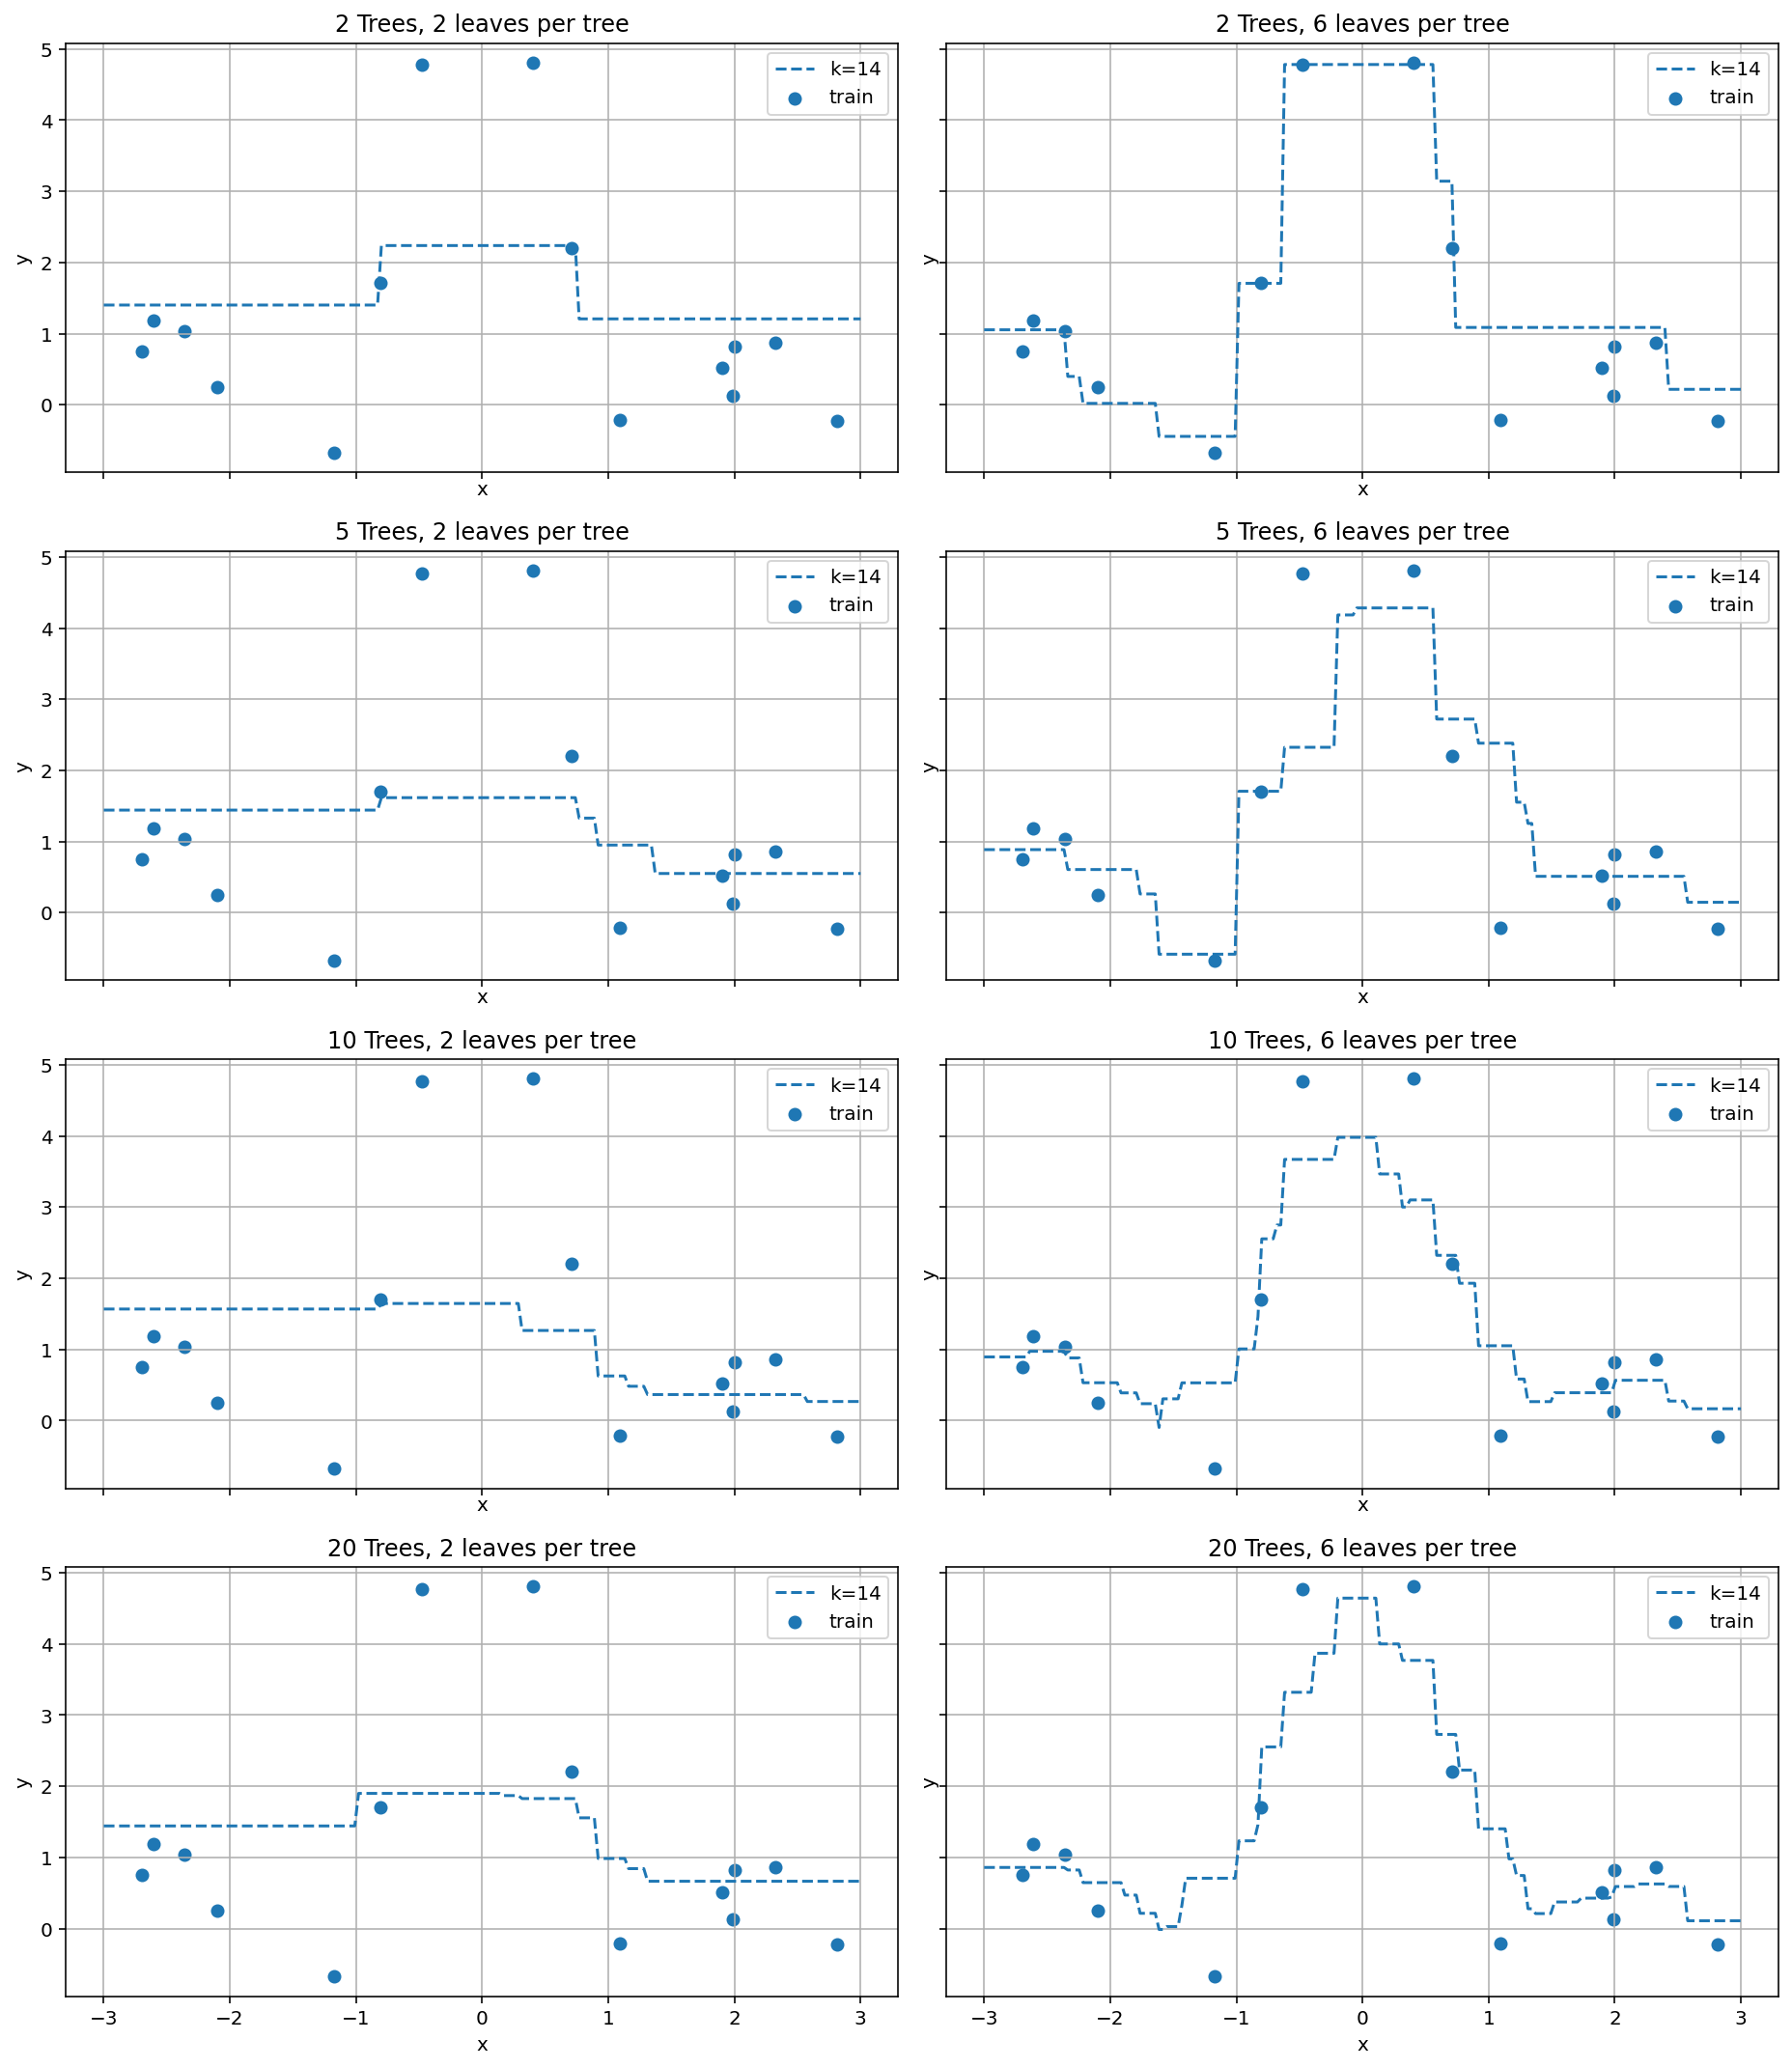

In [52]:
from sklearn.ensemble import RandomForestRegressor
v_hh = [2,5,10,20]
fx,aa = plt.subplots(len(v_hh),2,sharex=True, sharey=True, figsize=(13,15))

for cc,kk in enumerate(v_hh):
  hojas=2
  clf = RandomForestRegressor(max_leaf_nodes=hojas,
                       n_estimators=kk)
  clf.fit(x_reg.reshape(-1,1), y_reg)
  pg = clf.predict(xg.reshape(-1,1))
  aa[cc][0].scatter(x_reg,y_reg, label ='train')
  aa[cc][0].plot(xg, pg, linestyle='--', label='k={0:d}'.format(k))
  aa[cc][0].grid()
  aa[cc][0].legend()
  _=aa[cc][0].set_xlabel('x')
  _=aa[cc][0].set_ylabel('y')
  _=aa[cc][0].set_title("{0:d} Trees, {1:d} leaves per tree".format(kk, hojas))

  hojas=6
  clf = RandomForestRegressor(max_leaf_nodes=hojas,
                       n_estimators=kk)
  clf.fit(x_reg.reshape(-1,1), y_reg)
  pg = clf.predict(xg.reshape(-1,1))
  aa[cc][1].scatter(x_reg,y_reg, label ='train')
  aa[cc][1].plot(xg, pg, linestyle='--', label='k={0:d}'.format(k))
  aa[cc][1].grid()
  aa[cc][1].legend()
  _=aa[cc][1].set_xlabel('x')
  _=aa[cc][1].set_ylabel('y')
  _=aa[cc][1].set_title("{0:d} Trees, {1:d} leaves per tree".format(kk, hojas))

  fx.tight_layout()